This project focuses on exploratory data analysis of social media usage. It aims to answer critical questions about user behavior, preferences, and productivity loss:
<h2>User Segmentation:</h2> Grouping users by age, income, and other demographics.<br>
<h2>Time Spent on Social Media:</h2> Analyzing time spent by different user segments.<br>
<h2>Video Preferences:</h2> Identifying video categories preferred by users across segments.<br>
<h2>Video Sentiment:</h2> Assessing whether users prefer useful or trivial content.<br>
<h2>Viewing Motivations:</h2> Exploring reasons behind video consumption for various user groups.<br>
<h2>Time Allocation:</h2> Examining the ratio of time spent watching videos to overall time on social media.<br>
<h2>Importance of Videos:</h2> Understanding video viewing significance for user groups.<br>
<h2>Productivity Loss:</h2> Evaluating productivity loss for different video categories, user groups, and platforms.<br>
<h2>Viewing Habits:</h2> Investigating the time of day and platforms preferred by users with varying productivity levels.<br>
<h2>Addiction Levels:</h2> Measuring social media addiction for segments, video categories, professions, genders, and countries.<br>
<h2>Platform Analysis:</h2> Identifying preferred platforms, average time spent, scroll levels, videos watched, and assessing the average addiction and productivity loss for each platform.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv("social_networks.csv")

In [7]:
df

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,22,Male,India,74254,True,True,Students,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,5:45 PM,10,0,At work,Mobile Data
996,997,40,Female,Pakistan,27006,False,False,Waiting staff,Urban,Facebook,...,8,2,Boredom,Smartphone,MacOS,10:15 PM,10,0,At home,Mobile Data
997,998,27,Male,India,94218,True,True,Waiting staff,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,10:15 PM,10,0,Commuting,Mobile Data
998,999,61,Male,Pakistan,85344,True,False,Students,Urban,YouTube,...,3,7,Procrastination,Smartphone,MacOS,10:15 PM,5,5,At work,Wi-Fi


<h1>Functions required for operations</h1>

In [10]:
def categorize_age(age):
    if 18 <= age <= 34:
        return 'Young adults'
    elif 35 <= age <= 49:
        return 'Middle adults'
    elif 50 <= age <= 64:
        return 'Late adults'
    else:
        return 'Other category'

In [12]:
def categorize_income(income):
    if 20000 <= income <= 50000:
        return 'Beginning specialists'
    elif 50000 <= income <= 80000:
        return 'Middle specialists'
    elif 80000 <= income <= 100000:
        return 'High specialists'
    else:
        return None

In [14]:
def video_category_quality(category):
    positive_quality = ['Life Hacks', 'Vlogs', 'Trends', 'ASMR']
    if category in positive_quality:
        return "Useful information"
    else:
        return "Useless information"

In [16]:
def categorize_video_time(ratio):
    if ratio < 20:
        return "Low"
    elif 20 < ratio < 40:
        return "Medium"
    else:
        return "High"

In [18]:
def categorize_video_importance(importance):
    if importance < 4:
        return "Low"
    elif 4 <= importance < 7:
        return "Medium"
    elif 7 <= importance <= 10:
        return "High"
    else:
        return None

In [20]:
def switch_time_of_day(time):
    if time == 'Afternoon':
        return 'Evening'
    elif time == 'Evening': 
        return 'Afternoon'
    else:
        return time

In [22]:
def categorize_productivity(productivity):
    if productivity < 4:
        return "High loss"
    elif 4 <= productivity < 7:
        return "Medium loss"
    else:
        return "Low loss"

In [24]:
def categorize_addiction(addiction):
    if addiction < 4:
        return "No addiction"
    elif 4 <= addiction < 7:
        return "Possible addiction"
    else:
        return "Addiction"

<h1>Analysis of the ratio of countries, age and income groups, genders and so on.</h1>
<h1>Basic understanding of data in a dataframe</h1>

In [48]:
country_counts = df['Location'].value_counts()
gender_counts = df['Gender'].value_counts()
platforms_counts = df['Platform'].value_counts()
video_cat = df['Video Category'].value_counts()
professions = df["Profession"].value_counts()
device = df["DeviceType"].value_counts()
watch_reason_counts = df['Watch Reason'].value_counts()

df['Frequency'] = df['Frequency'].apply(switch_time_of_day)
df['AgeCategory'] = df['Age'].apply(categorize_age)
df['IncomeCategory'] = df['Income'].apply(categorize_income)

age_category_counts = df['AgeCategory'].value_counts()
income_category_counts = df['IncomeCategory'].value_counts()
time_of_day_counts = df['Frequency'].value_counts()

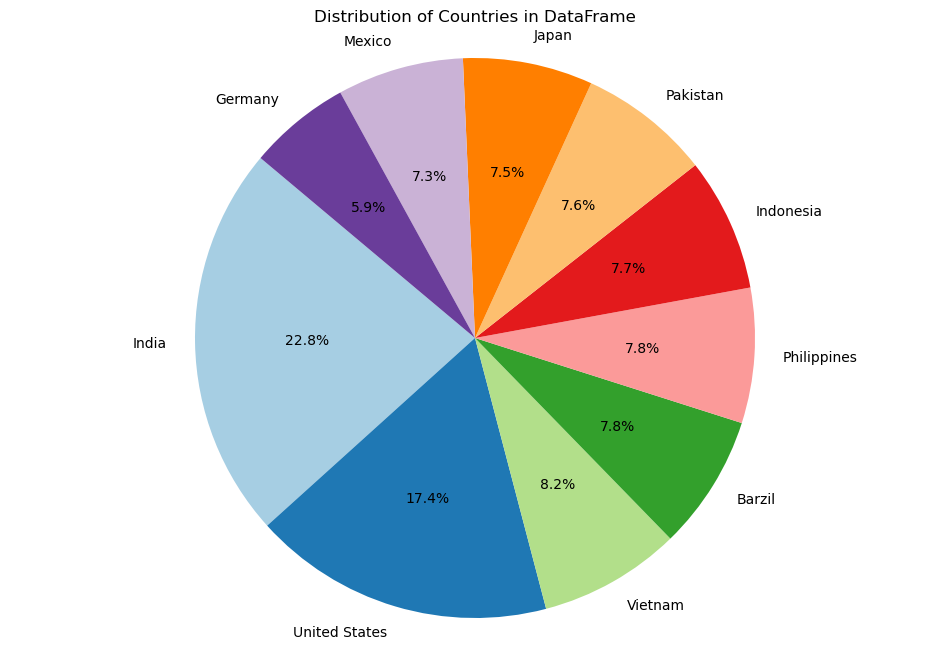

In [29]:
plt.figure(figsize=(12, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Countries in DataFrame')
plt.axis('equal')
plt.show()

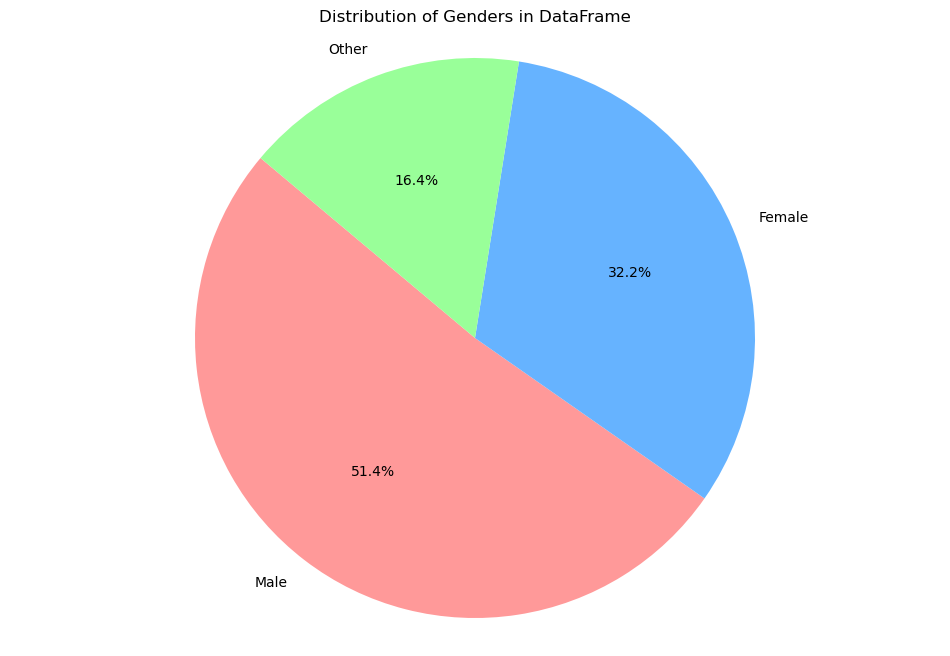

In [31]:
plt.figure(figsize=(12, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])
plt.title('Distribution of Genders in DataFrame')
plt.axis('equal')
plt.show()

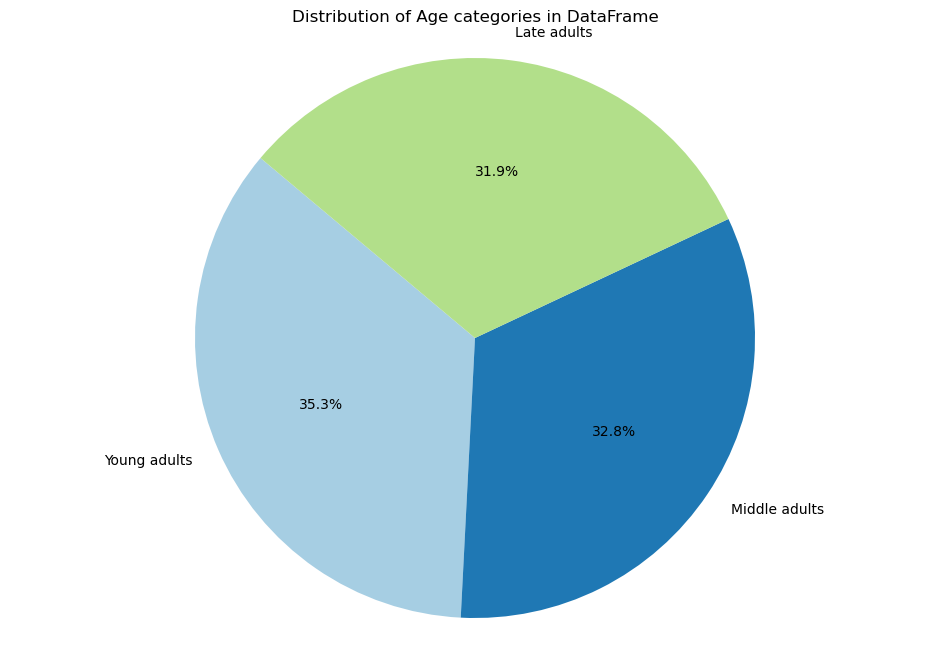

In [33]:
plt.figure(figsize=(12, 8))
plt.pie(age_category_counts, labels=age_category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Age categories in DataFrame')
plt.axis('equal')
plt.show()

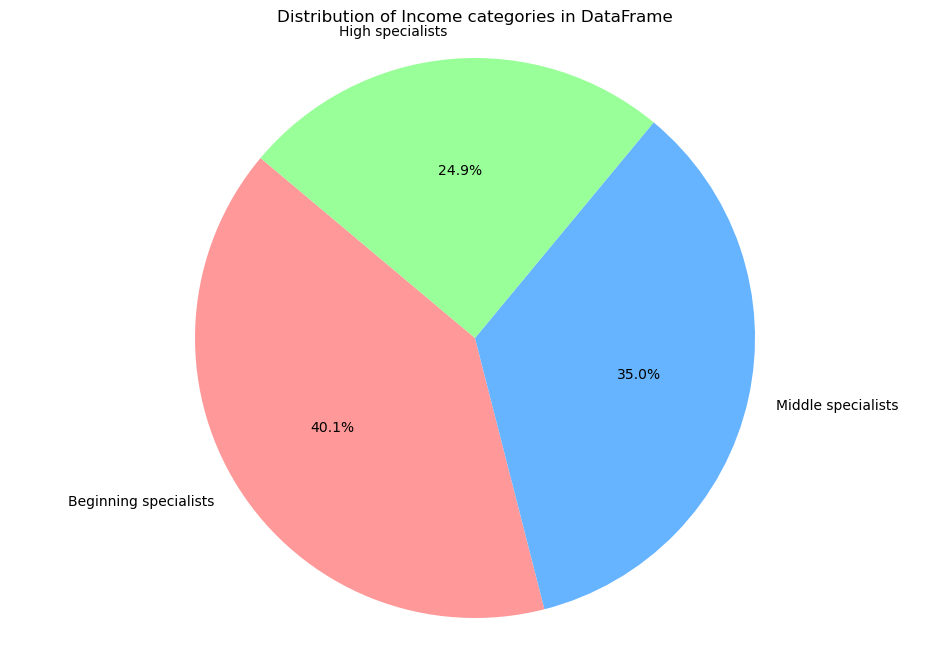

In [35]:
plt.figure(figsize=(12, 8))
plt.pie(income_category_counts, labels=income_category_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])
plt.title('Distribution of Income categories in DataFrame')
plt.axis('equal')
plt.show()

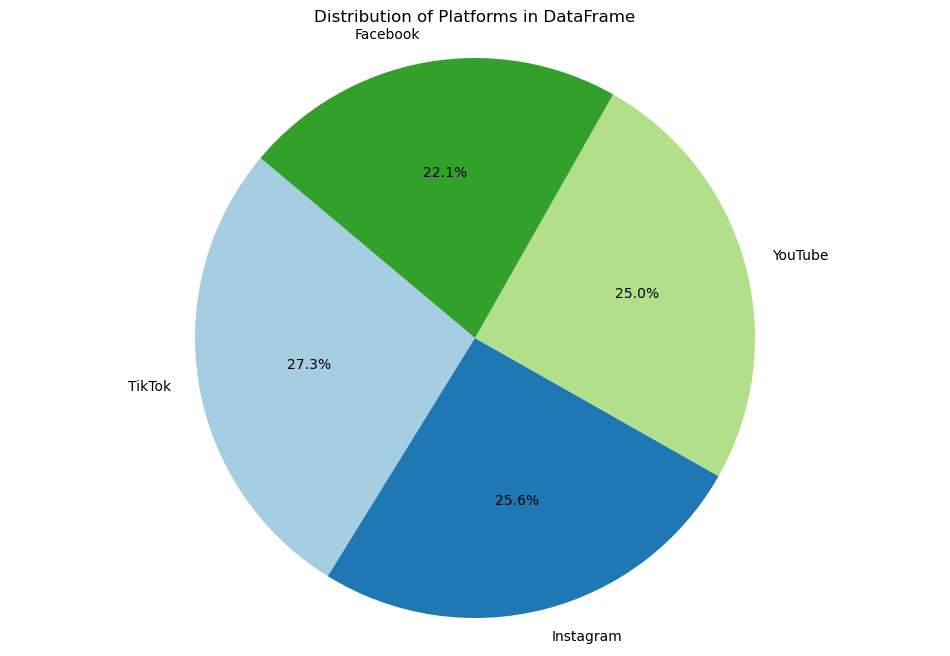

In [37]:
plt.figure(figsize=(12, 8))
plt.pie(platforms_counts, labels=platforms_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Platforms in DataFrame')
plt.axis('equal')
plt.show()

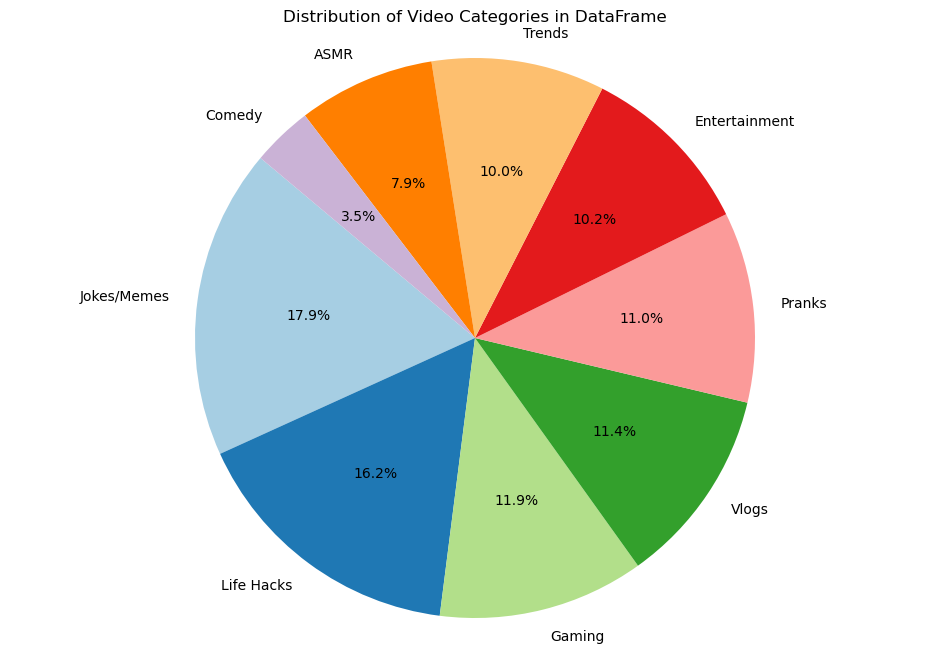

In [39]:
plt.figure(figsize=(12, 8))
plt.pie(video_cat, labels=video_cat.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Video Categories in DataFrame')
plt.axis('equal')
plt.show()

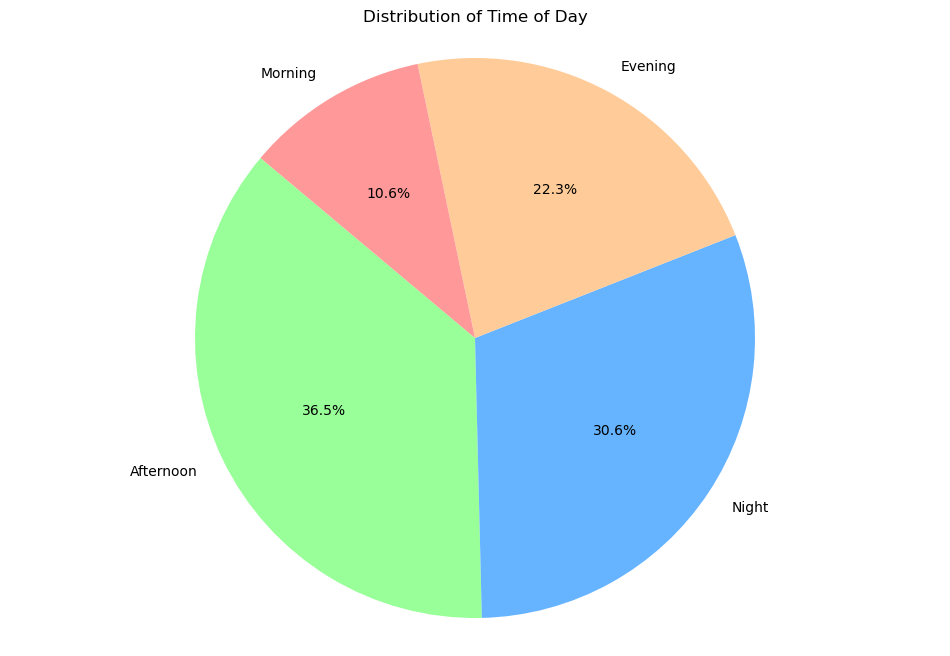

In [41]:
plt.figure(figsize=(12, 8))
plt.pie(time_of_day_counts, labels=time_of_day_counts.index, autopct='%1.1f%%', startangle=140, colors=['#99ff99', '#66b3ff', '#ffcc99', '#ff9999'])
plt.title('Distribution of Time of Day')
plt.axis('equal')
plt.show()

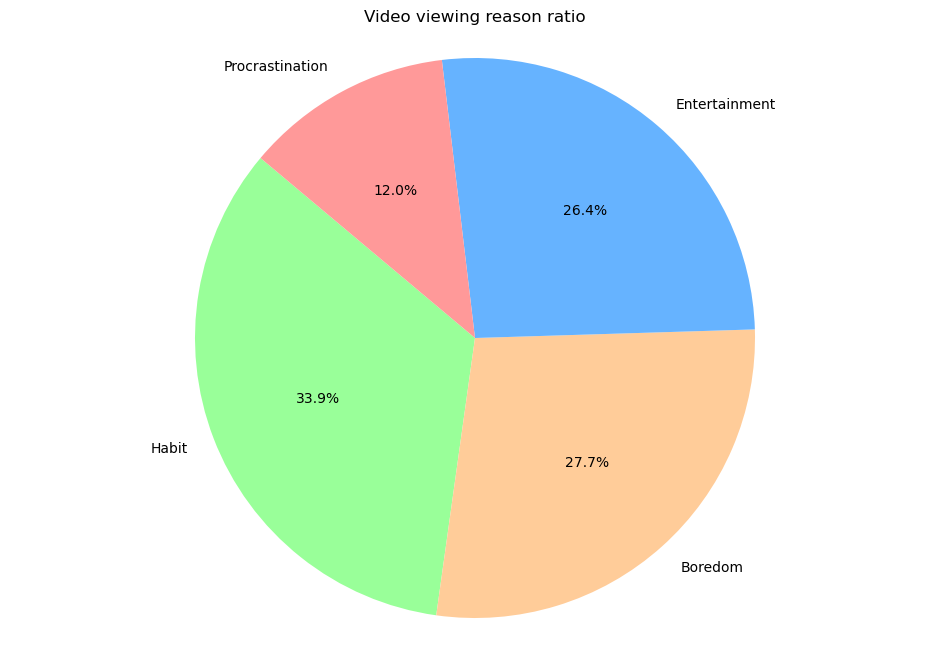

In [56]:
plt.figure(figsize=(12, 8))
plt.pie(watch_reason_counts, labels=watch_reason_counts.index, autopct='%1.1f%%', startangle=140, colors=['#99ff99', '#ffcc99', '#66b3ff', '#ff9999'])
plt.title('Video viewing reason ratio')
plt.axis('equal')
plt.show()

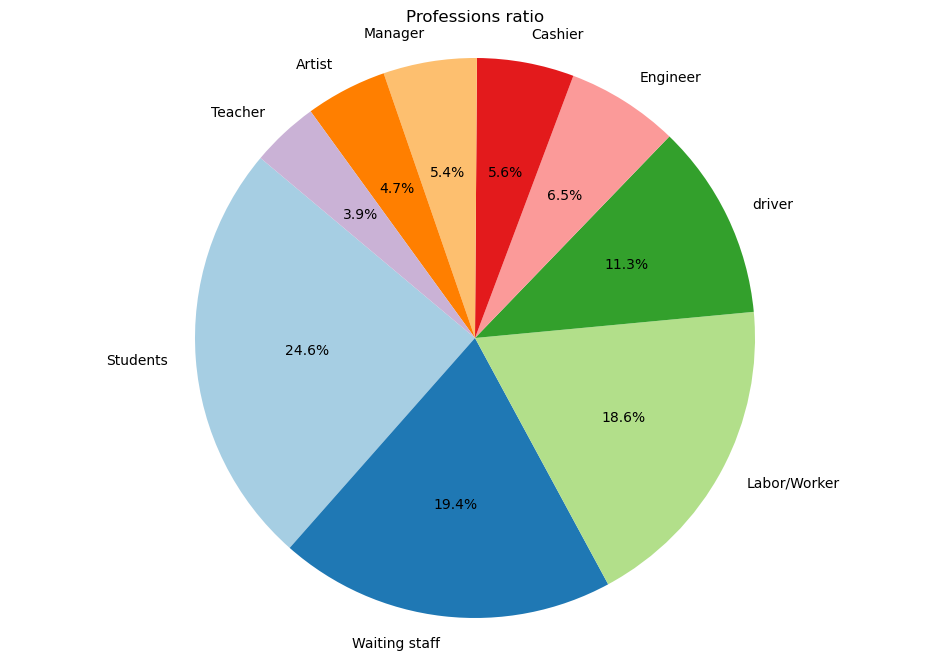

In [54]:
plt.figure(figsize=(12, 8))
plt.pie(professions, labels=professions.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Professions ratio')
plt.axis('equal')
plt.show()

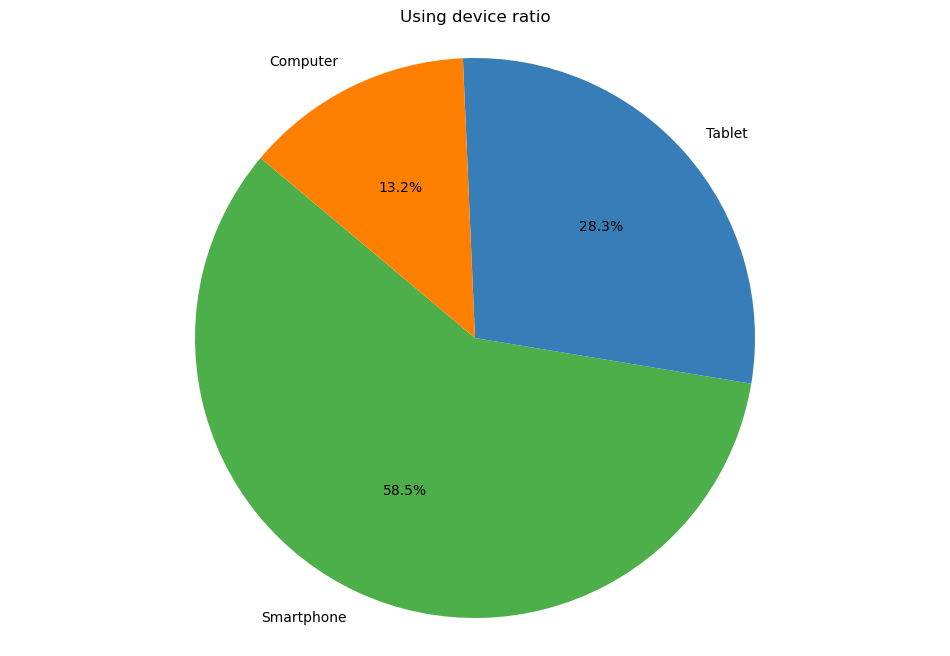

In [60]:
plt.figure(figsize=(12, 8))
plt.pie(device, labels=device.index, autopct='%1.1f%%', startangle=140, colors=['#4daf4a', '#377eb8', '#ff7f00'])
plt.title('Using device ratio')
plt.axis('equal')
plt.show()

<h1>Analysis of Average Time Spent on Social Networks by Various Parameters</h1>

In [64]:
country_df = df.groupby("Location")["Total Time Spent"].sum().sort_values(ascending=False)
mean_time_spent = country_df / country_counts
mean_time_spent = mean_time_spent.sort_values(ascending=False)
countries = mean_time_spent.index.tolist() 
time_mean_values = mean_time_spent.values.tolist()

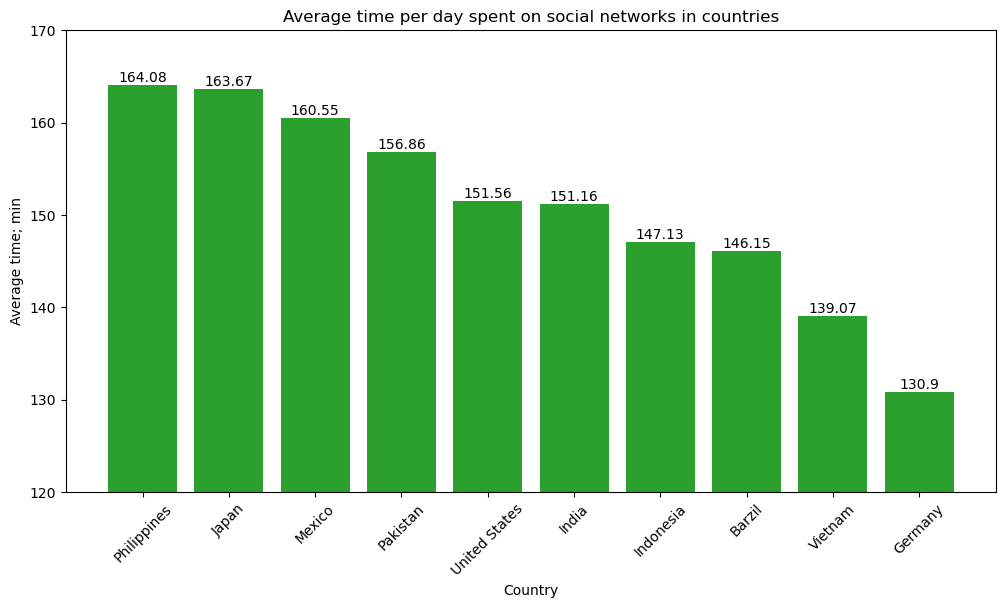

In [66]:
plt.figure(figsize=(12, 6))
bars = plt.bar(countries, time_mean_values, color='#2ca02c')
plt.xlabel('Country')
plt.ylabel('Average time; min')
plt.title('Average time per day spent on social networks in countries')
plt.xticks(rotation=45)
plt.ylim(120, 170)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [68]:
gender_time = df.groupby('Gender')["Total Time Spent"].sum()
avg_gender_time = gender_time / gender_counts
avg_gender_time = avg_gender_time.sort_values(ascending=False)
gender = avg_gender_time.index.tolist() 
avg_time = avg_gender_time.values.tolist()

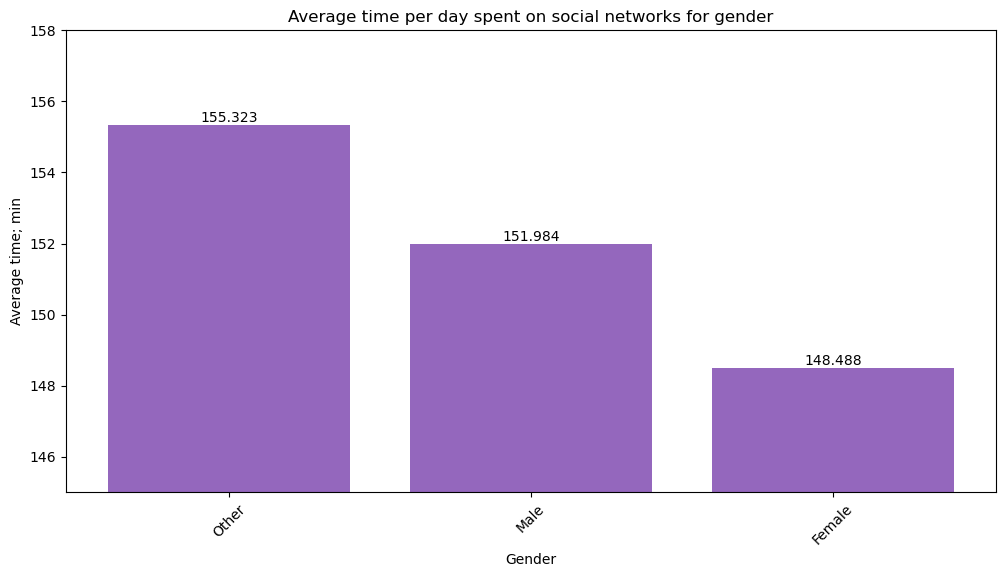

In [72]:
plt.figure(figsize=(12, 6))
bars = plt.bar(gender, avg_time, color='#9467bd')
plt.xlabel('Gender')
plt.ylabel('Average time; min')
plt.title('Average time per day spent on social networks for gender')
plt.xticks(rotation=45)
plt.ylim(145, 158)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.show()

In [74]:
max_age = df["Age"].max()
min_age = df["Age"].min()
mean_age = df["Age"].mean()

In [76]:
max_age, min_age, mean_age

(64, 18, 40.986)

In [78]:
age_category_time_spent = df.groupby('AgeCategory')['Total Time Spent'].sum()
avg_age_time = age_category_time_spent / age_category_counts
avg_age_time = avg_age_time.sort_values(ascending=False)
age_category = avg_age_time.index.tolist() 
avg_time = avg_age_time.values.tolist()

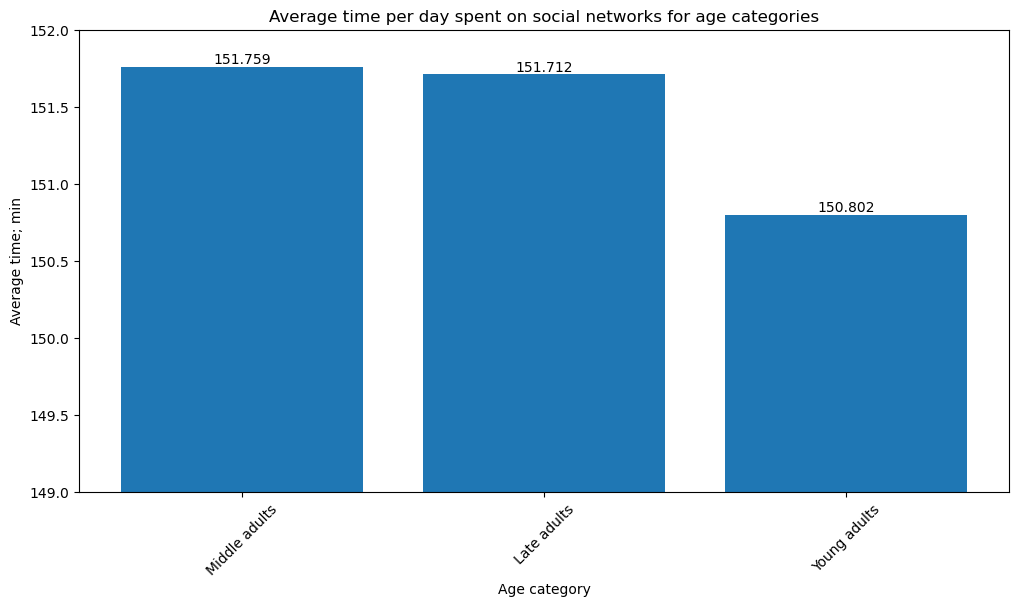

In [84]:
plt.figure(figsize=(12, 6))
bars = plt.bar(age_category, avg_time, color='#1f77b4')
plt.xlabel('Age category')
plt.ylabel('Average time; min')
plt.title('Average time per day spent on social networks for age categories')
plt.xticks(rotation=45)
plt.ylim(149, 152)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.show()

In [86]:
max_income = df["Income"].max()
min_income = df["Income"].min()
mean_income = df["Income"].mean()

In [90]:
max_income, min_income, mean_income

(99676, 20138, 59524.213)

In [92]:
income_category_time_spent = df.groupby('IncomeCategory')['Total Time Spent'].sum()
avg_income_time = income_category_time_spent / income_category_counts
avg_income_time = avg_income_time.sort_values(ascending=False)
income_category = avg_income_time.index.tolist() 
avg_time = avg_income_time.values.tolist()

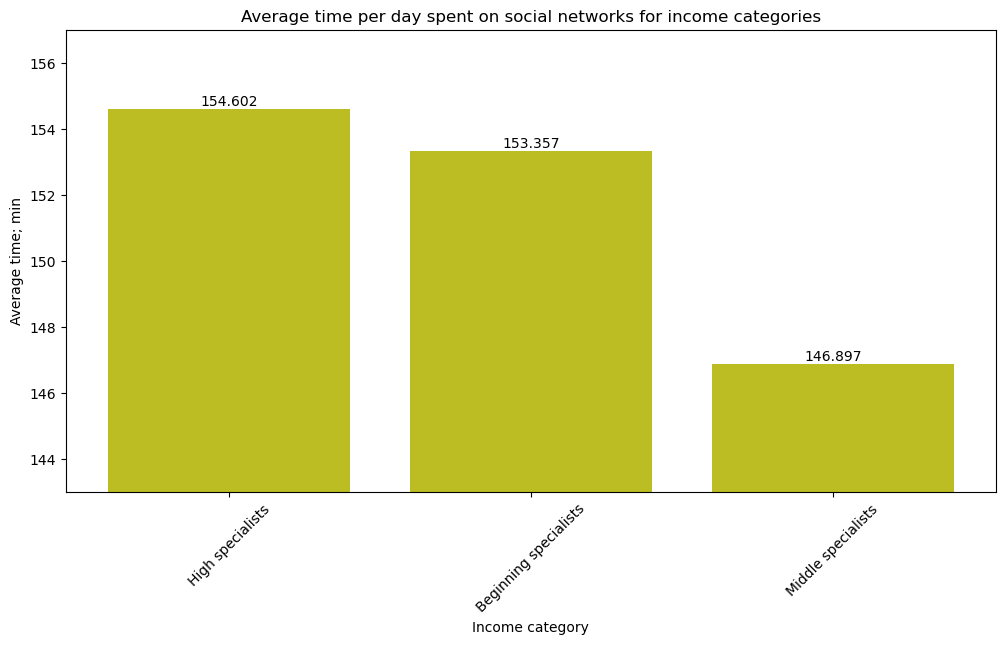

In [94]:
plt.figure(figsize=(12, 6))
bars = plt.bar(income_category, avg_time, color='#bcbd22')
plt.xlabel('Income category')
plt.ylabel('Average time; min')
plt.title('Average time per day spent on social networks for income categories')
plt.xticks(rotation=45)
plt.ylim(143, 157)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.show()

In [160]:
time_of_day_distribution = df.groupby('Frequency')['Total Time Spent'].mean().sort_values(ascending=False)
day_time = time_of_day_distribution.index.tolist() 
mean_time = time_of_day_distribution.values.tolist()

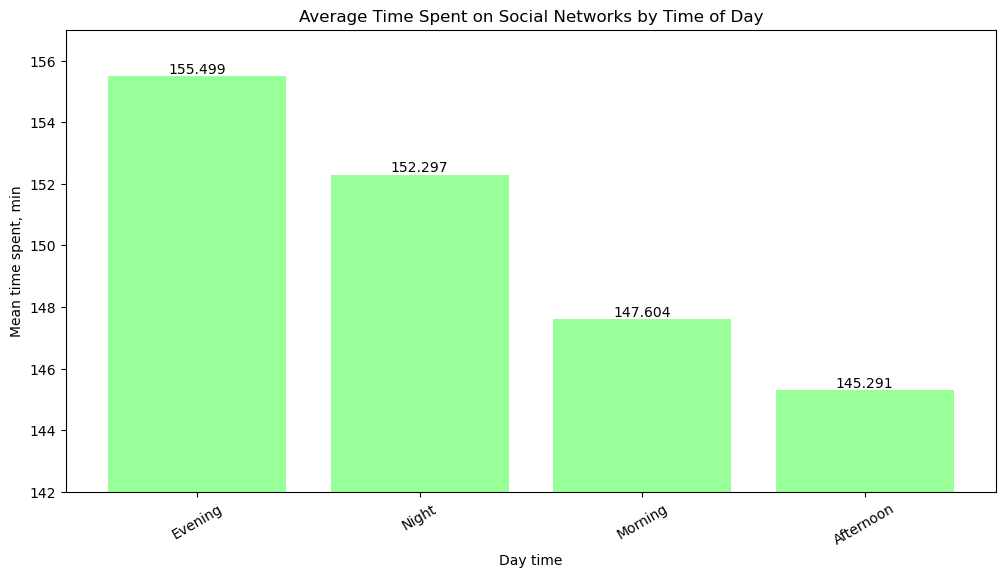

In [162]:
plt.figure(figsize=(12, 6))
bars = plt.bar(day_time, mean_time, color='#99ff99')
plt.xlabel('Day time')
plt.ylabel('Mean time spent, min')
plt.title('Average Time Spent on Social Networks by Time of Day')
plt.xticks(rotation=30)
plt.ylim(142, 157)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.show()

In [156]:
mean_addiction_level_professions = df.groupby('Profession')['Total Time Spent'].mean().sort_values(ascending=False)
prof = mean_addiction_level_professions.index.tolist() 
time = mean_addiction_level_professions.values.tolist()

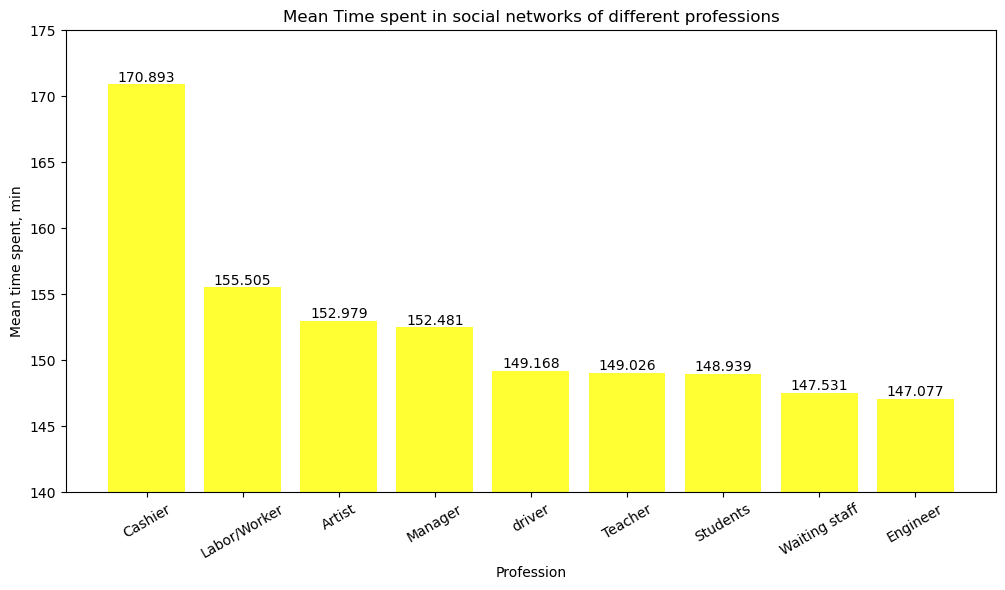

In [158]:
plt.figure(figsize=(12, 6))
bars = plt.bar(prof, time, color='#ffff33')
plt.xlabel('Profession')
plt.ylabel('Mean time spent, min')
plt.title('Mean Time spent in social networks of different professions')
plt.xticks(rotation=30)
plt.ylim(140, 175)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.show()

In [311]:
platform_total_time = df.groupby('Platform')['Total Time Spent'].mean().sort_values(ascending=False)
platform = platform_total_time.index.tolist() 
time = platform_total_time.values.tolist()

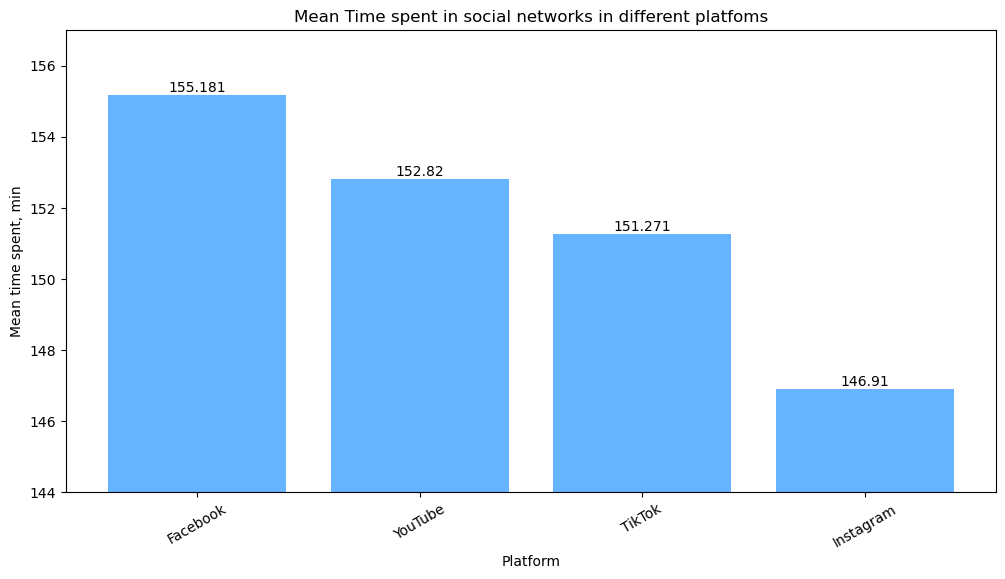

In [313]:
plt.figure(figsize=(12, 6))
bars = plt.bar(platform, time, color='#66b3ff') #377eb8
plt.xlabel('Platform')
plt.ylabel('Mean time spent, min')
plt.title('Mean Time spent in social networks in different platfoms')
plt.xticks(rotation=30)
plt.ylim(144, 157)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.show()

In [144]:
mean_time_device = df.groupby('DeviceType')['Total Time Spent'].mean().sort_values(ascending=False)
device = mean_time_device.index.tolist() 
mean_time = mean_time_device.values.tolist()

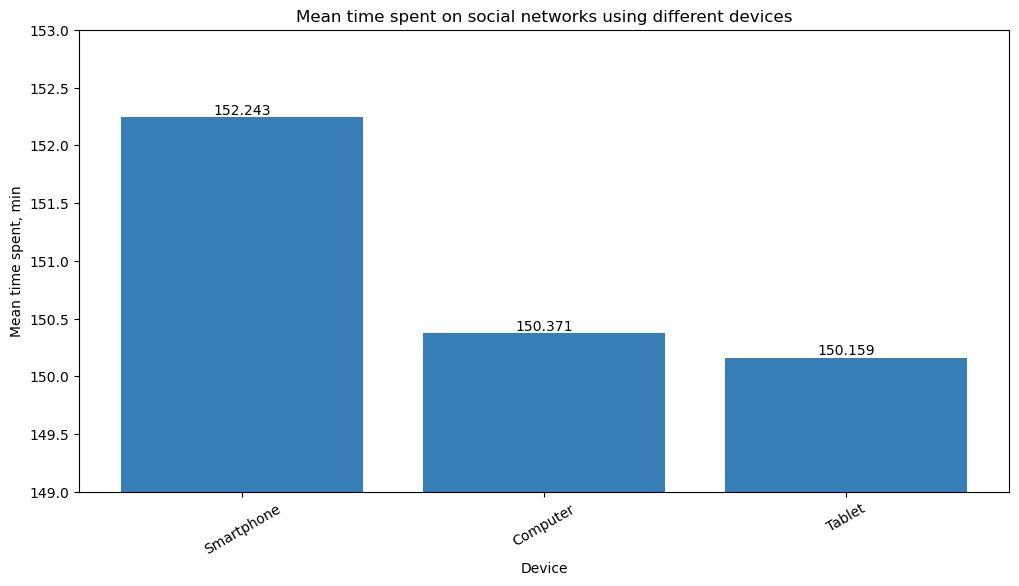

In [150]:
plt.figure(figsize=(12, 6))
bars = plt.bar(device, mean_time, color='#377eb8') #377eb8
plt.xlabel('Device')
plt.ylabel('Mean time spent, min')
plt.title('Mean time spent on social networks using different devices')
plt.xticks(rotation=30)
plt.ylim(149, 153)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.show()

<h1>The Impact of Video on Social Media</h1>

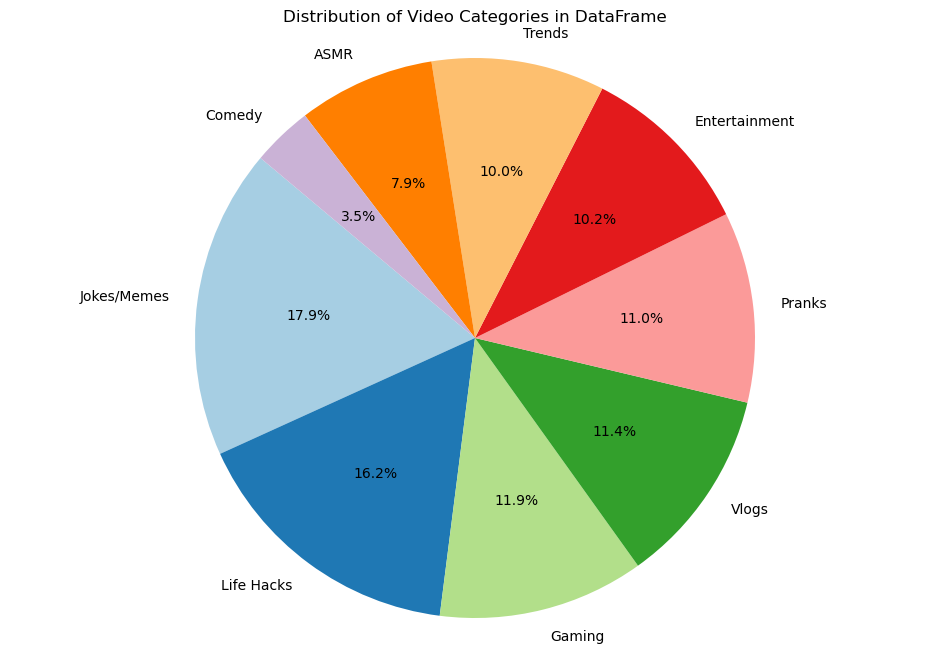

In [165]:
plt.figure(figsize=(12, 8))
plt.pie(video_cat, labels=video_cat.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Video Categories in DataFrame')
plt.axis('equal')
plt.show()

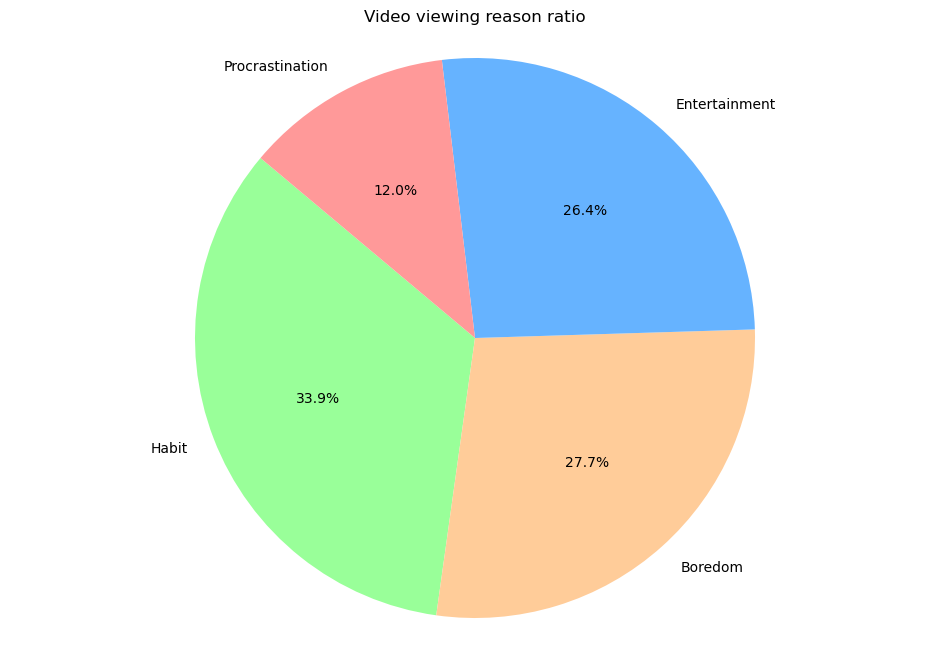

In [167]:
plt.figure(figsize=(12, 8))
plt.pie(watch_reason_counts, labels=watch_reason_counts.index, autopct='%1.1f%%', startangle=140, colors=['#99ff99', '#ffcc99', '#66b3ff', '#ff9999'])
plt.title('Video viewing reason ratio')
plt.axis('equal')
plt.show()

In [169]:
df['Video Category Quality'] = df['Video Category'].apply(video_category_quality)
video_cat_quality_counts = df['Video Category Quality'].value_counts()

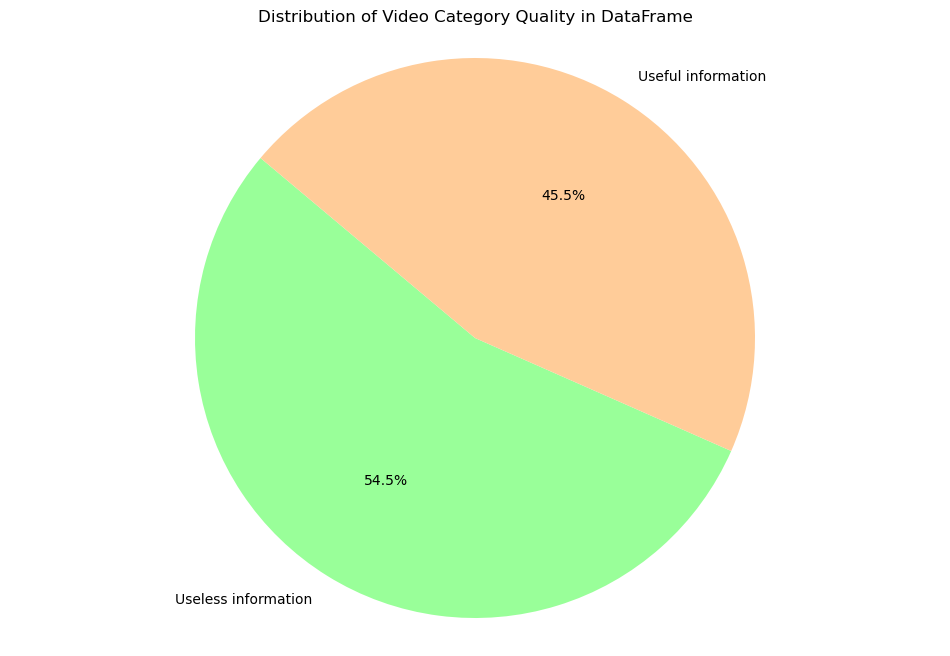

In [171]:
plt.figure(figsize=(12, 8))
plt.pie(video_cat_quality_counts, labels=video_cat_quality_counts.index, autopct='%1.1f%%', startangle=140, colors=['#99ff99','#ffcc99'])
plt.title('Distribution of Video Category Quality in DataFrame')
plt.axis('equal')
plt.show()

In [173]:
df['Video Time Ratio'] = (df['Time Spent On Video'] / df['Total Time Spent']) * 100 # in %
df.loc[df['Video Time Ratio'] > 100, 'Video Time Ratio'] = None
max_video_time = df["Video Time Ratio"].max()
min_video_time = df["Video Time Ratio"].min()
mean_video_time = df["Video Time Ratio"].mean() 

In [175]:
max_video_time, min_video_time, mean_video_time

(100.0, 0.3389830508474576, 15.575684568089953)

In [177]:
df["Video Time Category"] = df["Video Time Ratio"].apply(categorize_video_time)
video_time_ration_counts = df["Video Time Category"].value_counts()

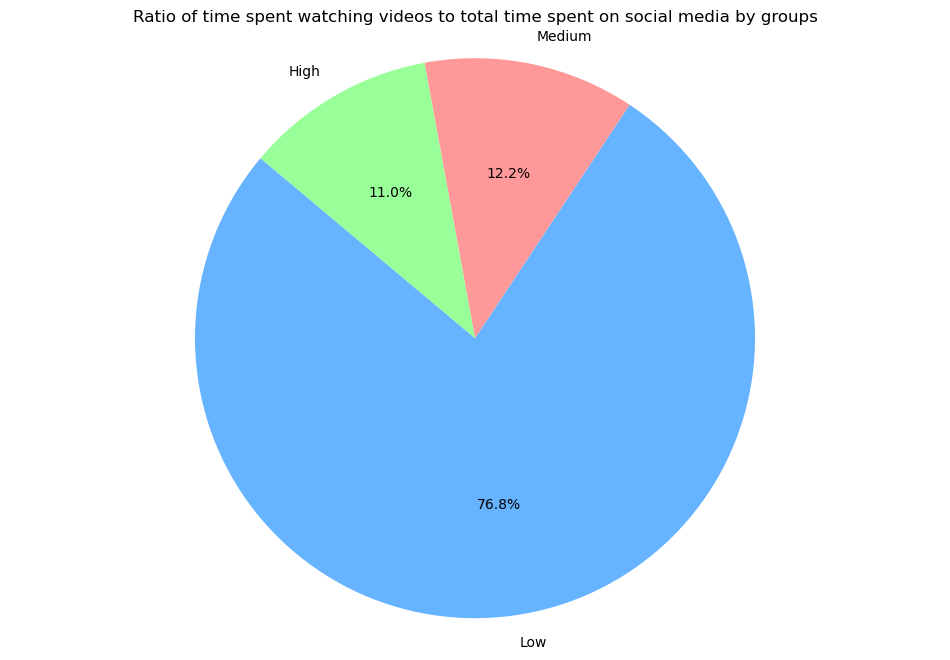

In [179]:
plt.figure(figsize=(12, 8))
plt.pie(video_time_ration_counts, labels=video_time_ration_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999', '#99ff99'])
plt.title('Ratio of time spent watching videos to total time spent on social media by groups')
plt.axis('equal')
plt.show()

In [181]:
df["Importance Category"] = df["Importance Score"].apply(categorize_video_importance)
video_importance_cat_counts = df["Importance Category"].value_counts()

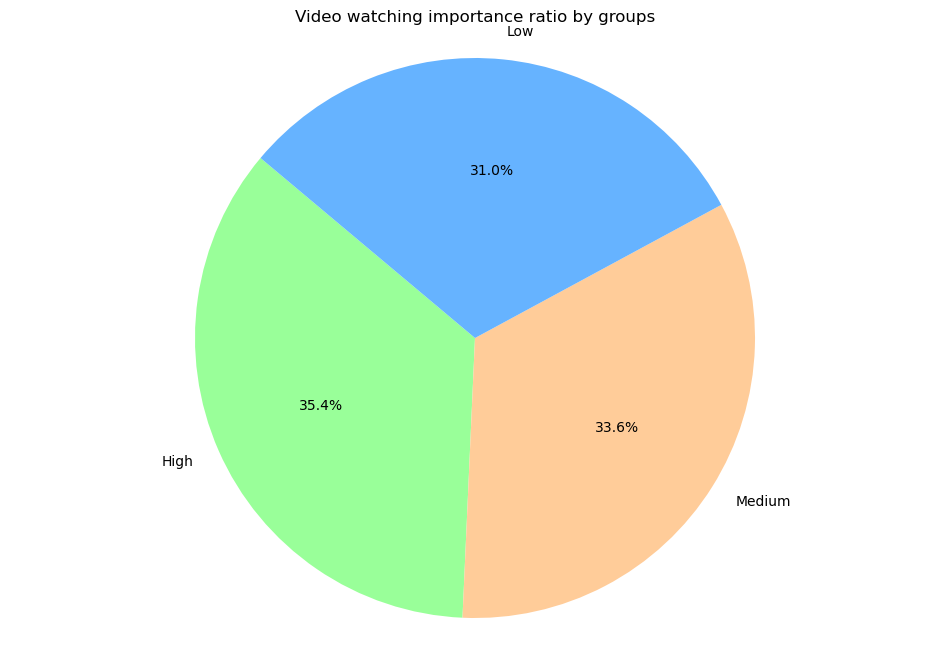

In [227]:
plt.figure(figsize=(12, 8))
plt.pie(video_importance_cat_counts, labels=video_importance_cat_counts.index, autopct='%1.1f%%', startangle=140, colors=['#99ff99', '#ffcc99', '#66b3ff'])
plt.title('Video watching importance ratio by groups')
plt.axis('equal')
plt.show()

In [185]:
video_cat_and_their_mean_importance = df.groupby('Video Category')['Importance Score'].mean().sort_values(ascending=False)
video_cat = video_cat_and_their_mean_importance.index.tolist() 
importance_score = video_cat_and_their_mean_importance.values.tolist()

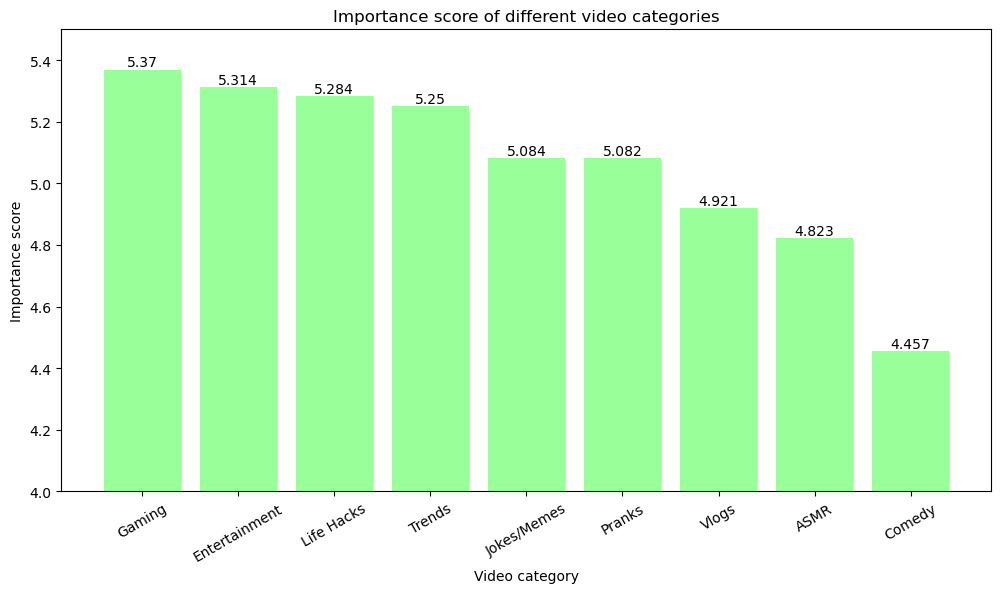

In [357]:
plt.figure(figsize=(12, 6))
bars = plt.bar(video_cat, importance_score, color='#99ff99')
plt.xlabel('Video category')
plt.ylabel('Importance score')
plt.title('Importance score of different video categories')
plt.xticks(rotation=30)
plt.ylim(4, 5.5)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.show()

In [347]:
mean_productivity_loss = df.groupby('Video Category')['ProductivityLoss'].mean().sort_values(ascending=False)
video_category = mean_productivity_loss.index.tolist() 
mean_prod_loss = mean_productivity_loss.values.tolist()

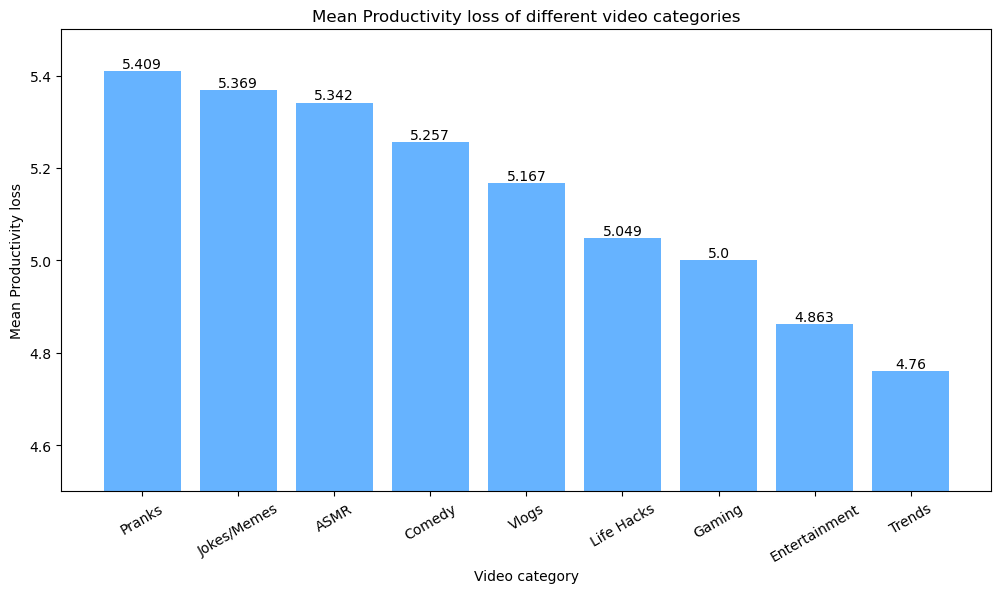

In [349]:
plt.figure(figsize=(12, 6))
bars = plt.bar(video_category, mean_prod_loss, color='#66b3ff')
plt.xlabel('Video category')
plt.ylabel('Mean Productivity loss')
plt.title('Mean Productivity loss of different video categories')
plt.xticks(rotation=30)
plt.ylim(4.5, 5.5)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.show()

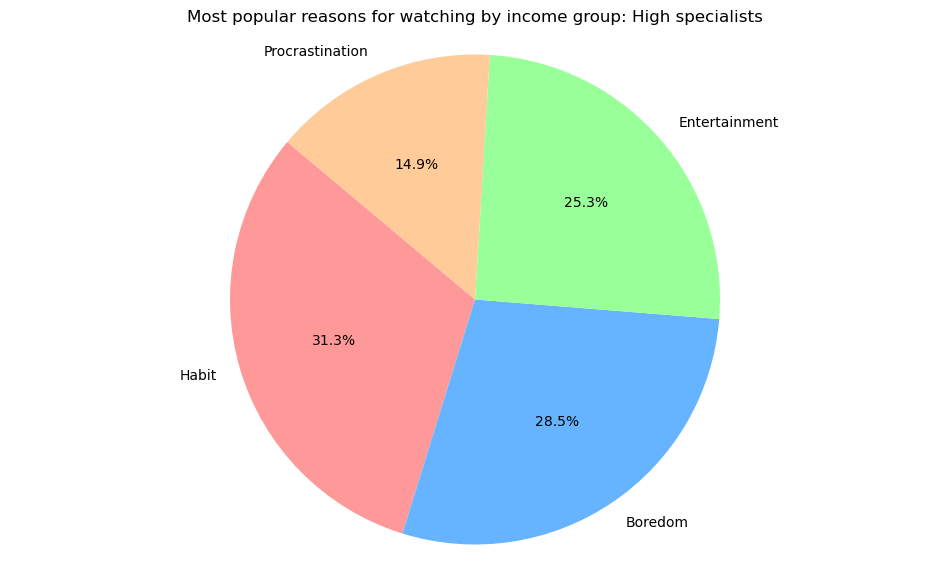

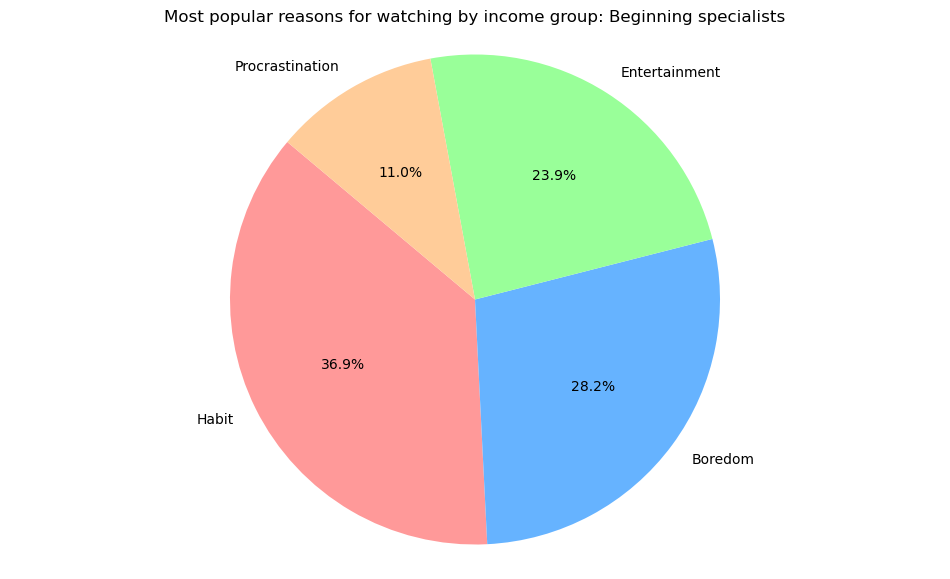

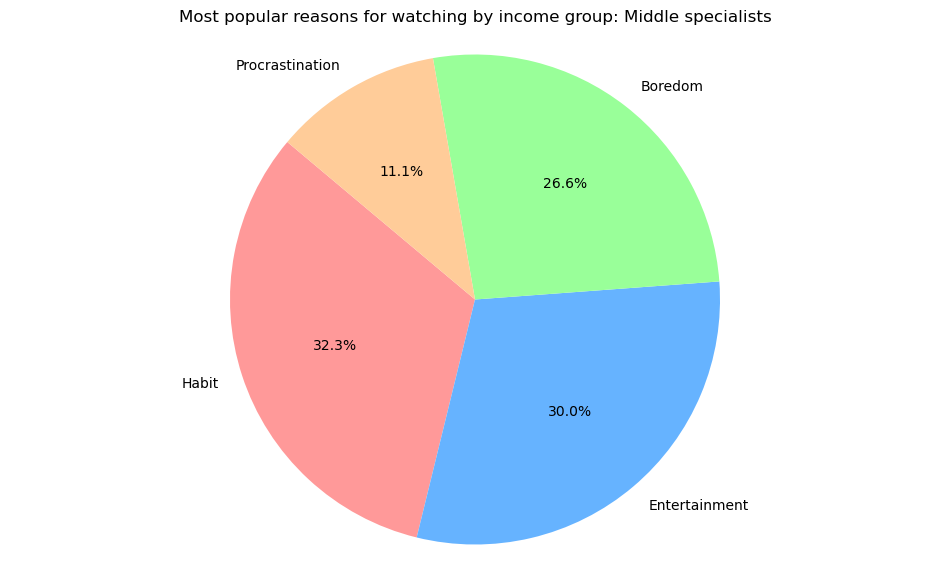

In [225]:
income_categories = df['IncomeCategory'].unique()
for category in income_categories:
    if category:
        plt.figure(figsize=(12, 7))
        sub_df = df[df['IncomeCategory'] == category]
        waych_reason_counts = sub_df['Watch Reason'].value_counts()
        plt.pie(waych_reason_counts, labels=waych_reason_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])
        plt.title(f'Most popular reasons for watching by income group: {category}')
        plt.axis('equal')
        plt.show()

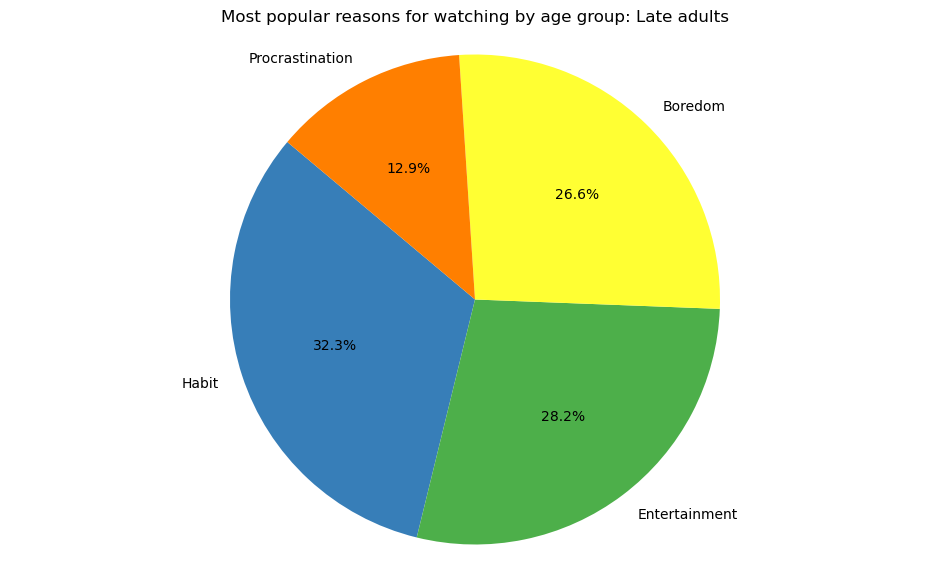

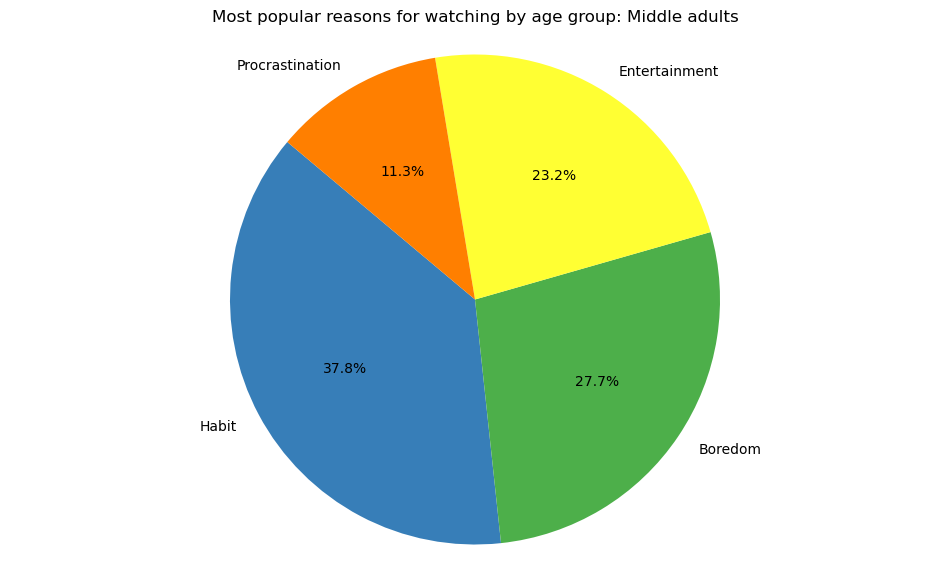

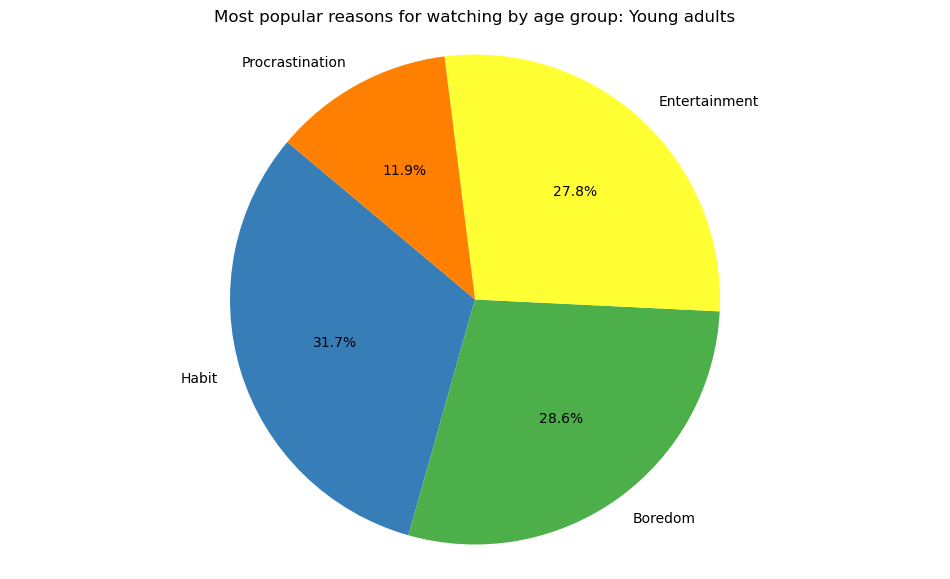

In [223]:
age_categories = df['AgeCategory'].unique()
for category in age_categories:
    if category:
        plt.figure(figsize=(12, 7))
        sub_df = df[df['AgeCategory'] == category]
        watch_reason_counts = sub_df['Watch Reason'].value_counts()
        plt.pie(watch_reason_counts, labels=watch_reason_counts.index, autopct='%1.1f%%', startangle=140, colors=['#377eb8', '#4daf4a', '#ffff33', '#ff7f00'])
        plt.title(f'Most popular reasons for watching by age group: {category}')
        plt.axis('equal')
        plt.show()

In [273]:
mean_addiction_level_content = df.groupby('Video Category')['Addiction Level'].mean().sort_values(ascending=False)
video_category = mean_addiction_level_content.index.tolist() 
mean_addiction_level = mean_addiction_level_content.values.tolist()

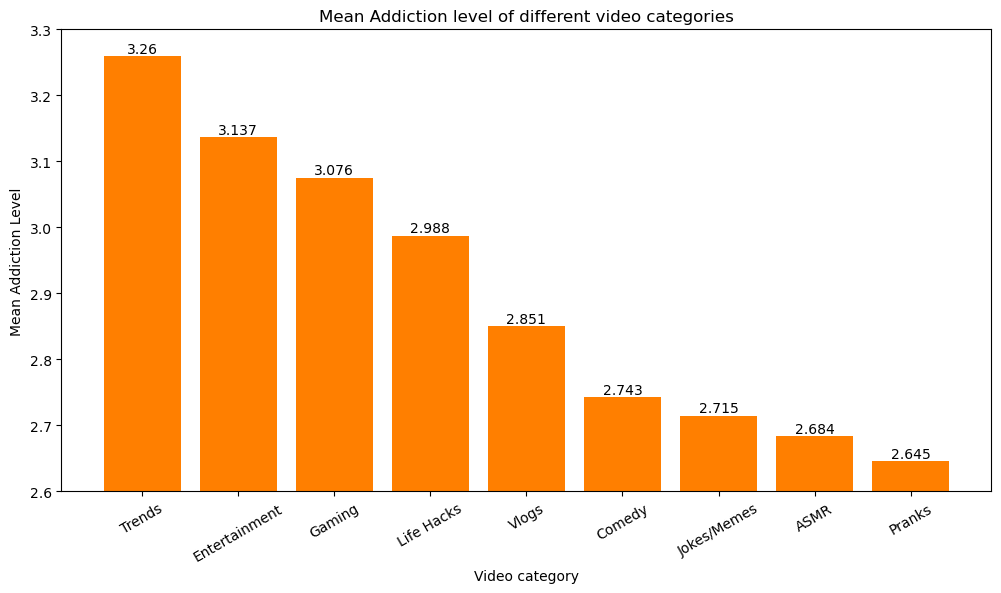

In [275]:
plt.figure(figsize=(12, 6))
bars = plt.bar(video_category, mean_addiction_level, color='#ff7f00')
plt.xlabel('Video category')
plt.ylabel('Mean Addiction Level')
plt.title('Mean Addiction level of different video categories')
plt.xticks(rotation=30)
plt.ylim(2.6, 3.3)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.show()

<h1>Productivity Loss</h1>

In [230]:
df["Productivity Loss Category"] = df["ProductivityLoss"].apply(categorize_productivity)
productivity_loss_cat_counts = df["Productivity Loss Category"].value_counts()

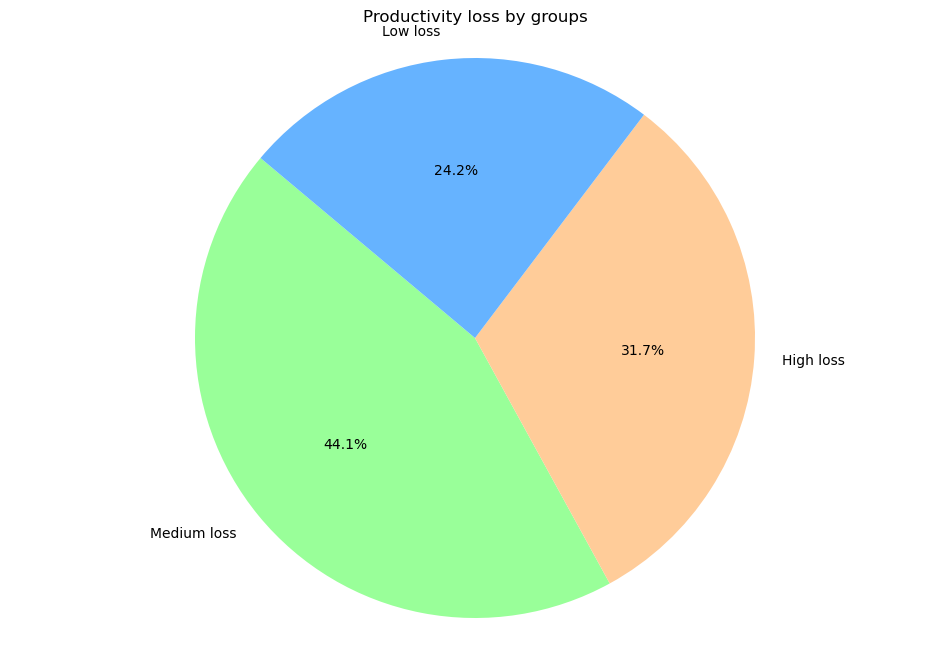

In [232]:
plt.figure(figsize=(12, 8))
plt.pie(productivity_loss_cat_counts, labels=productivity_loss_cat_counts.index, autopct='%1.1f%%', startangle=140, colors=['#99ff99', '#ffcc99', '#66b3ff'])
plt.title('Productivity loss by groups')
plt.axis('equal')
plt.show()

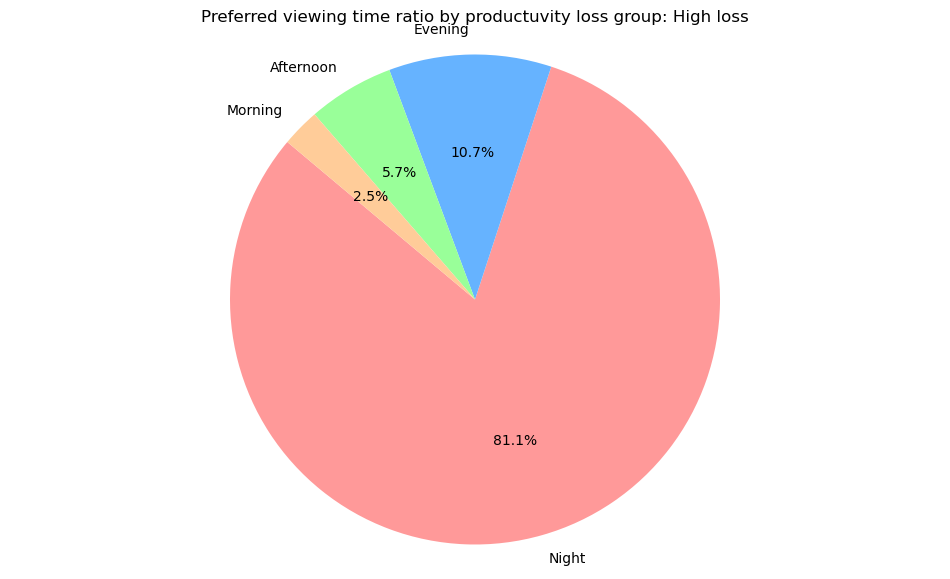

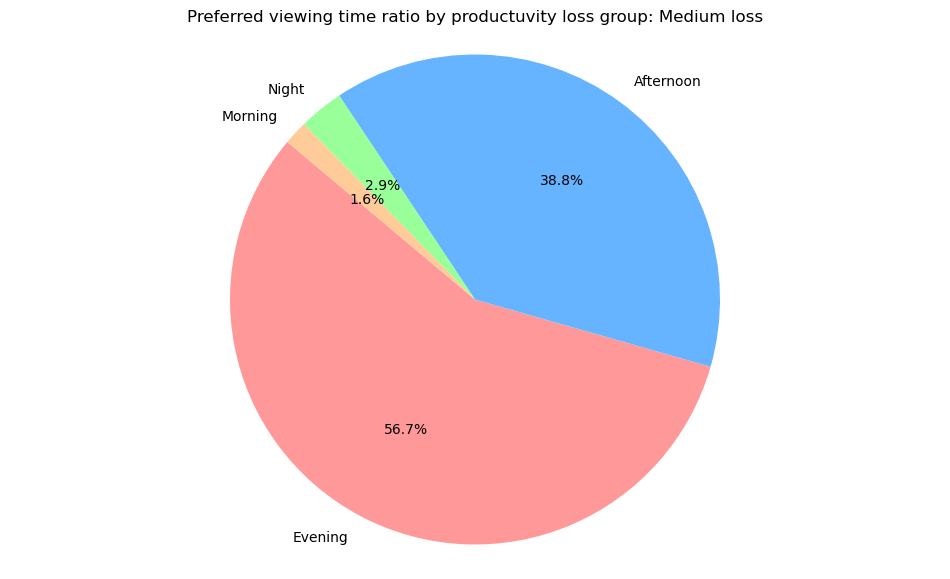

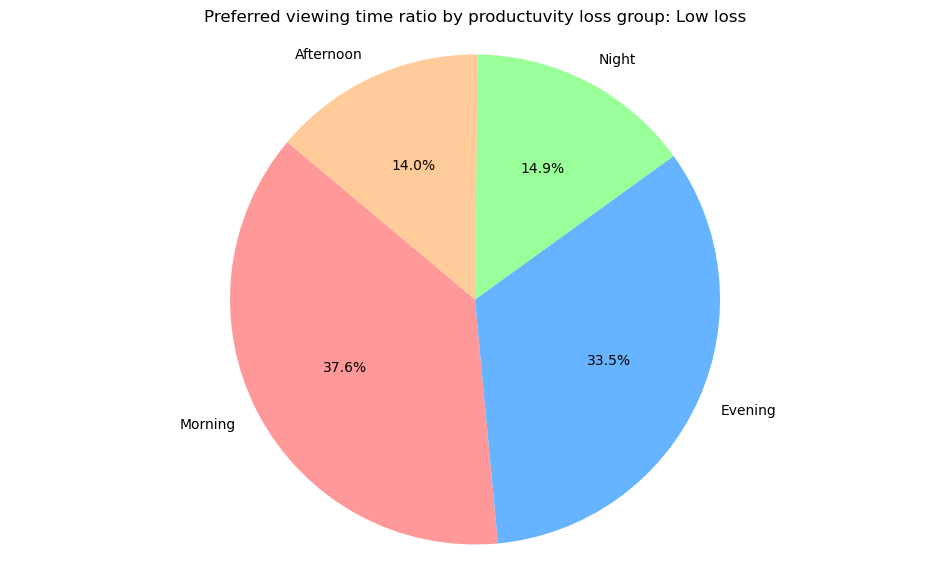

In [238]:
prod_loss_categories = df['Productivity Loss Category'].unique()
for category in prod_loss_categories:
    if category:
        plt.figure(figsize=(12, 7))
        sub_df = df[df['Productivity Loss Category'] == category]
        frequency_counts = sub_df['Frequency'].value_counts()
        plt.pie(frequency_counts, labels=frequency_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])
        plt.title(f'Preferred viewing time ratio by productuvity loss group: {category}')
        plt.axis('equal')
        plt.show()

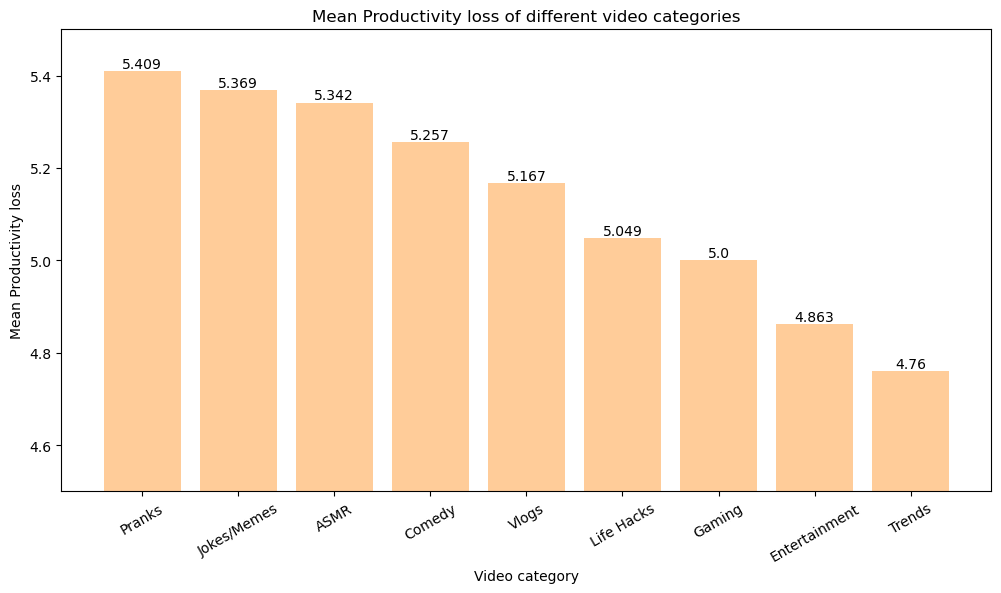

In [351]:
plt.figure(figsize=(12, 6))
bars = plt.bar(video_category, mean_prod_loss, color='#ffcc99')
plt.xlabel('Video category')
plt.ylabel('Mean Productivity loss')
plt.title('Mean Productivity loss of different video categories')
plt.xticks(rotation=30)
plt.ylim(4.5, 5.5)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.show()

In [246]:
mean_productivity_loss_income = df.groupby('IncomeCategory')['ProductivityLoss'].mean().sort_values(ascending=False)
income_category = mean_productivity_loss_income.index.tolist() 
mean_prod_loss = mean_productivity_loss_income.values.tolist()

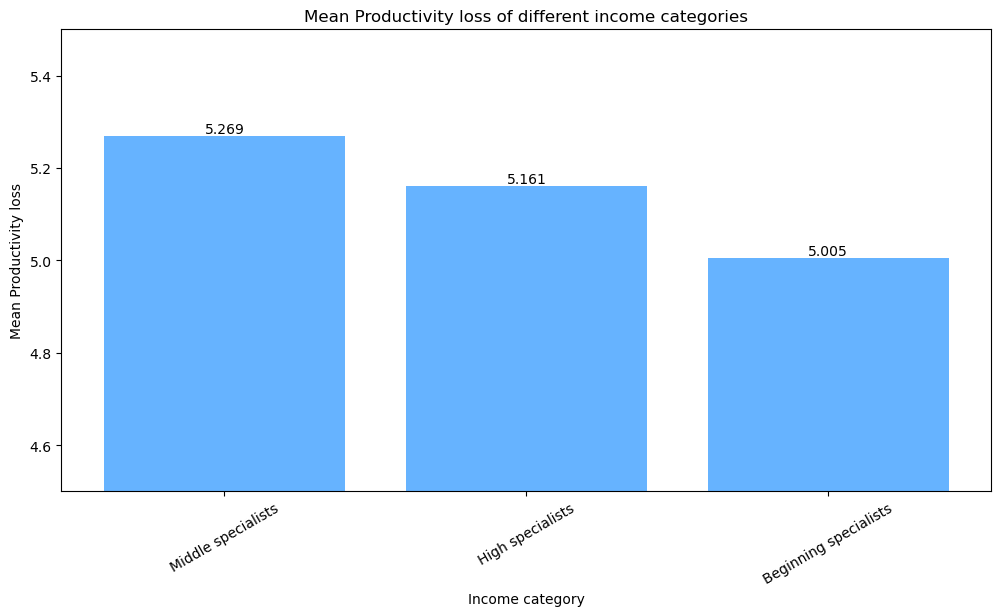

In [248]:
plt.figure(figsize=(12, 6))
bars = plt.bar(income_category, mean_prod_loss, color='#66b3ff')
plt.xlabel('Income category')
plt.ylabel('Mean Productivity loss')
plt.title('Mean Productivity loss of different income categories')
plt.xticks(rotation=30)
plt.ylim(4.5, 5.5)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.show()

In [361]:
platform_prod_loss = df.groupby('Platform')['ProductivityLoss'].mean().sort_values(ascending=False)
platform = platform_prod_loss.index.tolist() 
prod_loss = platform_prod_loss.values.tolist()

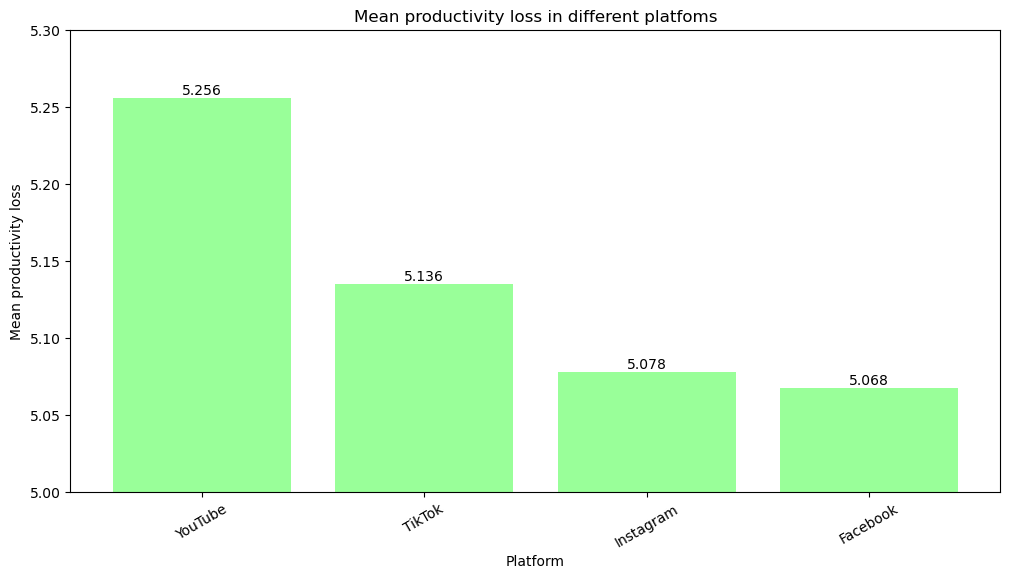

In [371]:
plt.figure(figsize=(12, 6))
bars = plt.bar(platform, prod_loss, color='#99ff99')
plt.xlabel('Platform')
plt.ylabel('Mean productivity loss')
plt.title('Mean productivity loss in different platfoms')
plt.xticks(rotation=30)
plt.ylim(5, 5.3)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.show()

<h1>Addiction Level</h1>

In [251]:
df["Addiction Level Category"] = df["Addiction Level"].apply(categorize_addiction)
addiction_level_cat_counts = df["Addiction Level Category"].value_counts()

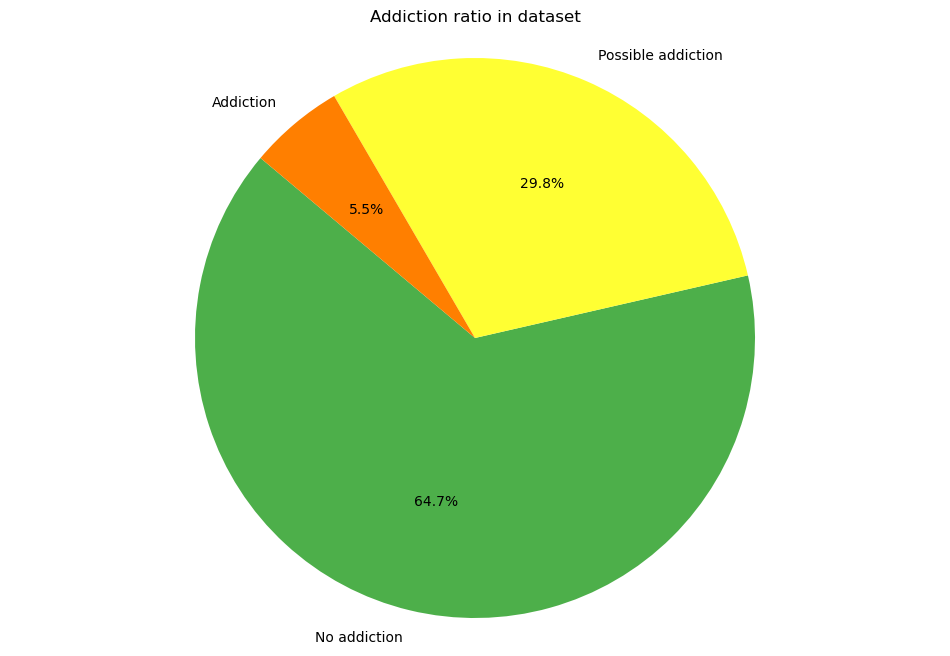

In [253]:
plt.figure(figsize=(12, 8))
plt.pie(addiction_level_cat_counts, labels=addiction_level_cat_counts.index, autopct='%1.1f%%', startangle=140, colors=['#4daf4a', '#ffff33', '#ff7f00'])
plt.title('Addiction ratio in dataset')
plt.axis('equal')
plt.show()

In [255]:
mean_addiction_level_income = df.groupby('IncomeCategory')['Addiction Level'].mean()
age_category = mean_addiction_level_income.index.tolist() 
mean_addiction_level = mean_addiction_level_income.values.tolist()

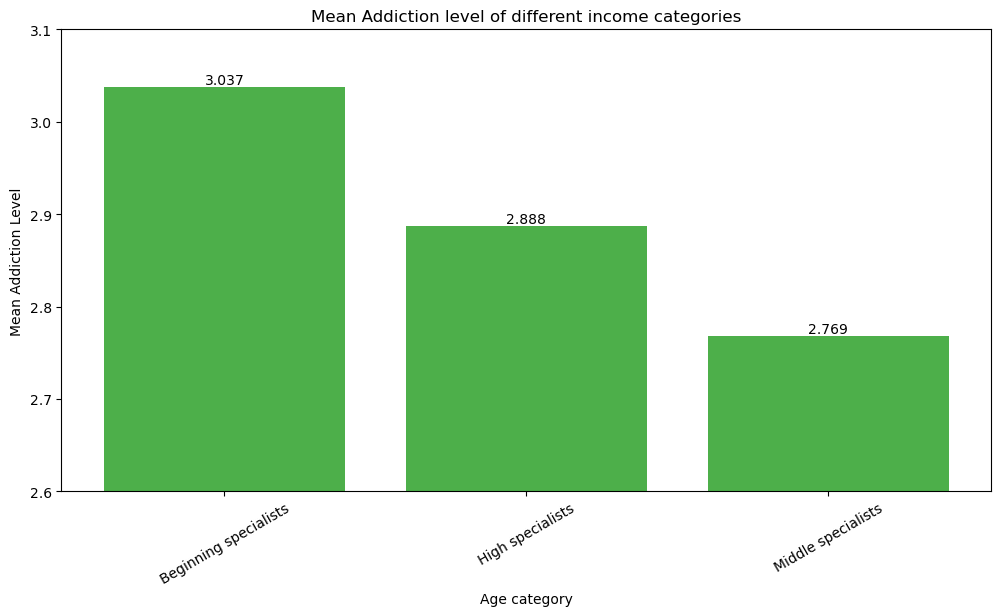

In [257]:
plt.figure(figsize=(12, 6))
bars = plt.bar(age_category, mean_addiction_level, color='#4daf4a')
plt.xlabel('Age category')
plt.ylabel('Mean Addiction Level')
plt.title('Mean Addiction level of different income categories')
plt.xticks(rotation=30)
plt.ylim(2.6, 3.1)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.show()

In [261]:
mean_addiction_level = df.groupby('AgeCategory')['Addiction Level'].mean().sort_values(ascending=False)
age_category = mean_addiction_level.index.tolist() 
mean_addiction_level = mean_addiction_level.values.tolist()

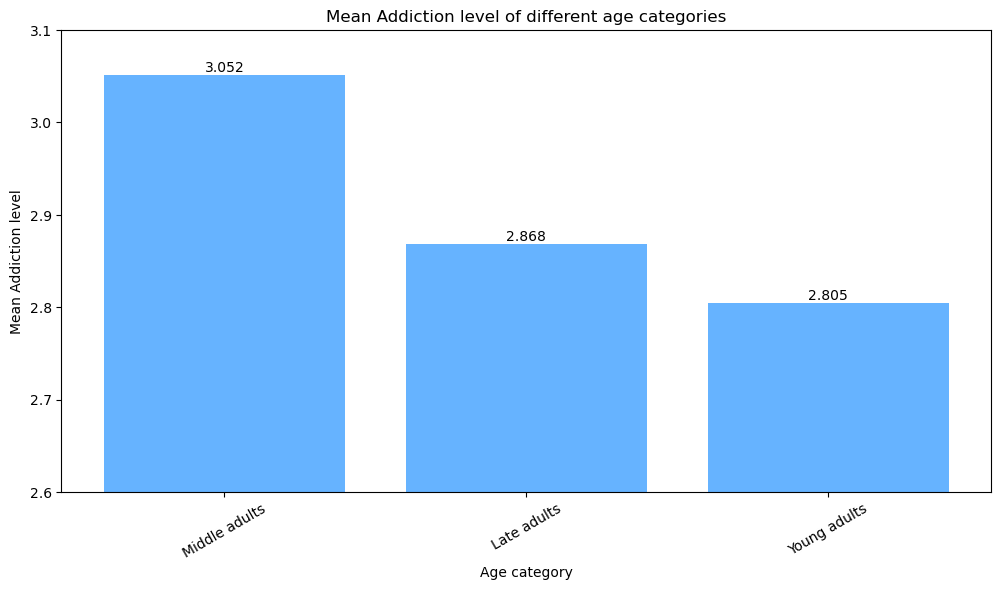

In [265]:
plt.figure(figsize=(12, 6))
bars = plt.bar(age_category, mean_addiction_level, color='#66b3ff')
plt.xlabel('Age category')
plt.ylabel('Mean Addiction level')
plt.title('Mean Addiction level of different age categories')
plt.xticks(rotation=30)
plt.ylim(2.6, 3.1)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.show()

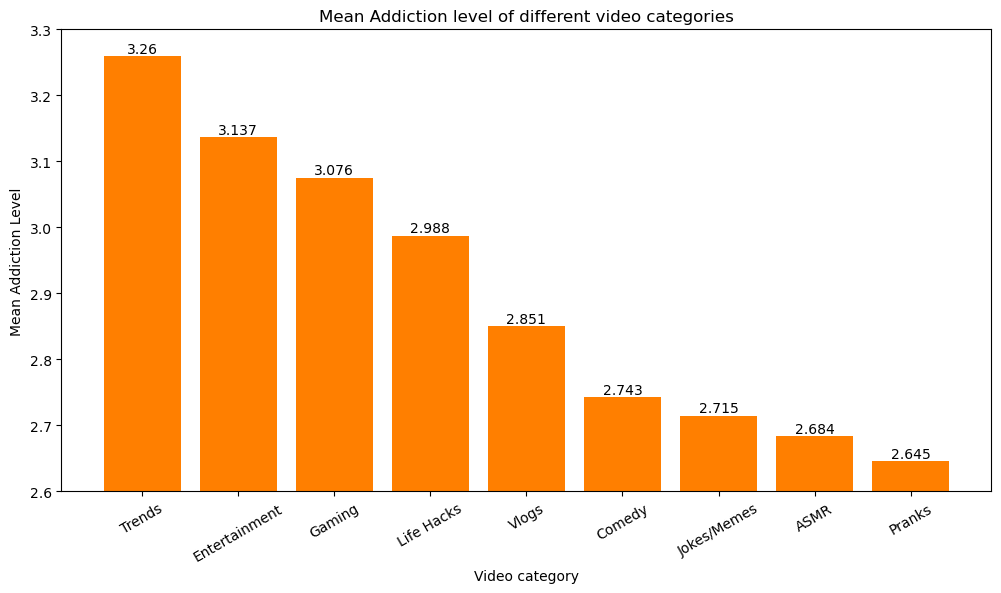

In [277]:
plt.figure(figsize=(12, 6))
bars = plt.bar(video_category, mean_addiction_level, color='#ff7f00')
plt.xlabel('Video category')
plt.ylabel('Mean Addiction Level')
plt.title('Mean Addiction level of different video categories')
plt.xticks(rotation=30)
plt.ylim(2.6, 3.3)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.show()

In [279]:
mean_addiction_level_professions = df.groupby('Profession')['Addiction Level'].mean().sort_values(ascending=False)
prof = mean_addiction_level_professions.index.tolist() 
mean_addiction_level = mean_addiction_level_professions.values.tolist()

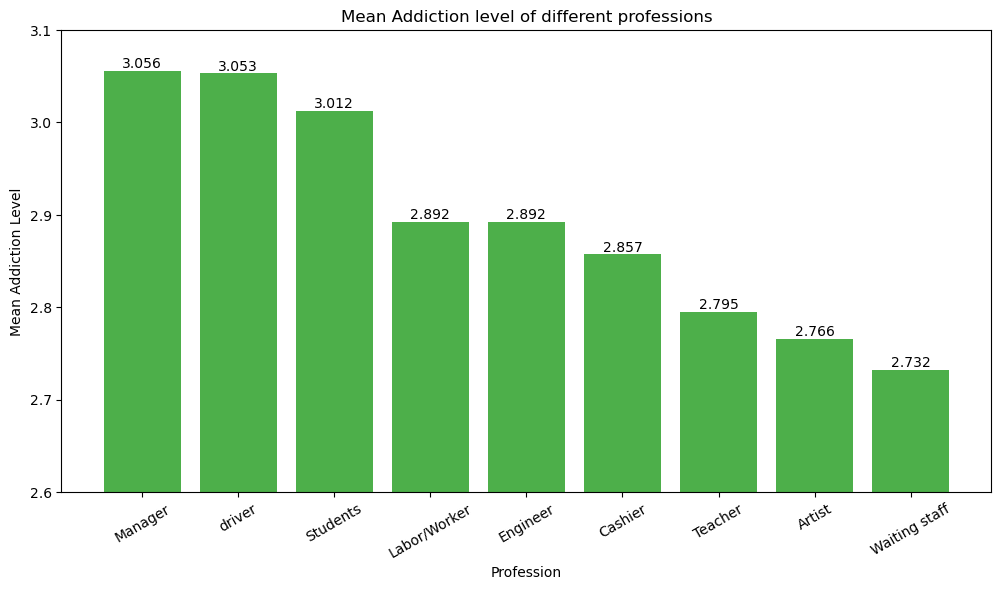

In [281]:
plt.figure(figsize=(12, 6))
bars = plt.bar(prof, mean_addiction_level, color='#4daf4a')
plt.xlabel('Profession')
plt.ylabel('Mean Addiction Level')
plt.title('Mean Addiction level of different professions')
plt.xticks(rotation=30)
plt.ylim(2.6, 3.1)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.show()

In [283]:
platform_addict_lvl = df.groupby('Platform')['Addiction Level'].mean().sort_values(ascending=False)
platform = platform_addict_lvl.index.tolist() 
add_lvl = platform_addict_lvl.values.tolist()

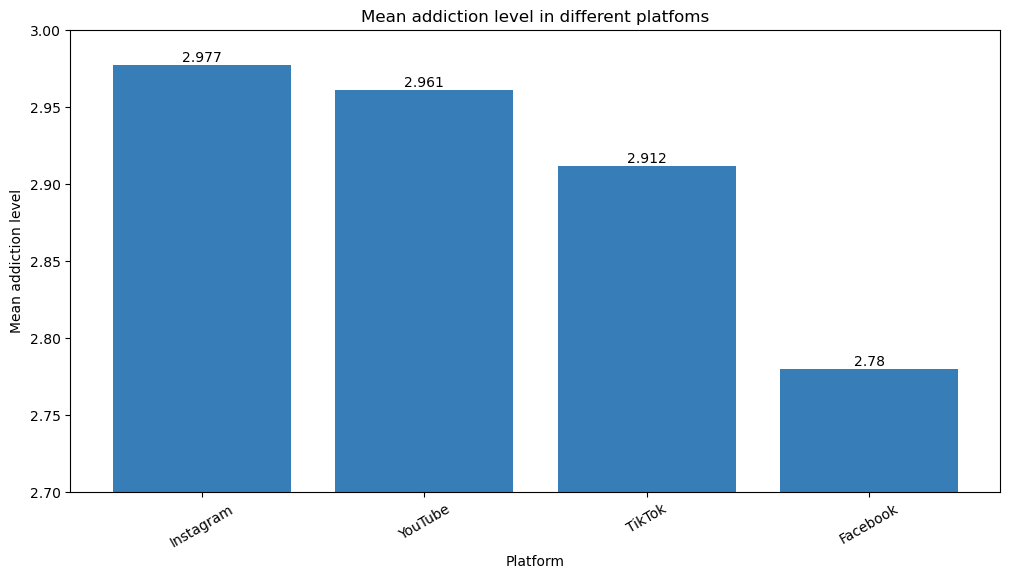

In [339]:
plt.figure(figsize=(12, 6))
bars = plt.bar(platform, add_lvl, color='#377eb8') #377eb8
plt.xlabel('Platform')
plt.ylabel('Mean addiction level')
plt.title('Mean addiction level in different platfoms')
plt.xticks(rotation=30)
plt.ylim(2.7, 3.)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.show()

In [401]:
gender_addict_lvl = df.groupby('Gender')['Addiction Level'].mean().sort_values(ascending=False)
gender = gender_addict_lvl.index.tolist() 
add_lvl = gender_addict_lvl.values.tolist()

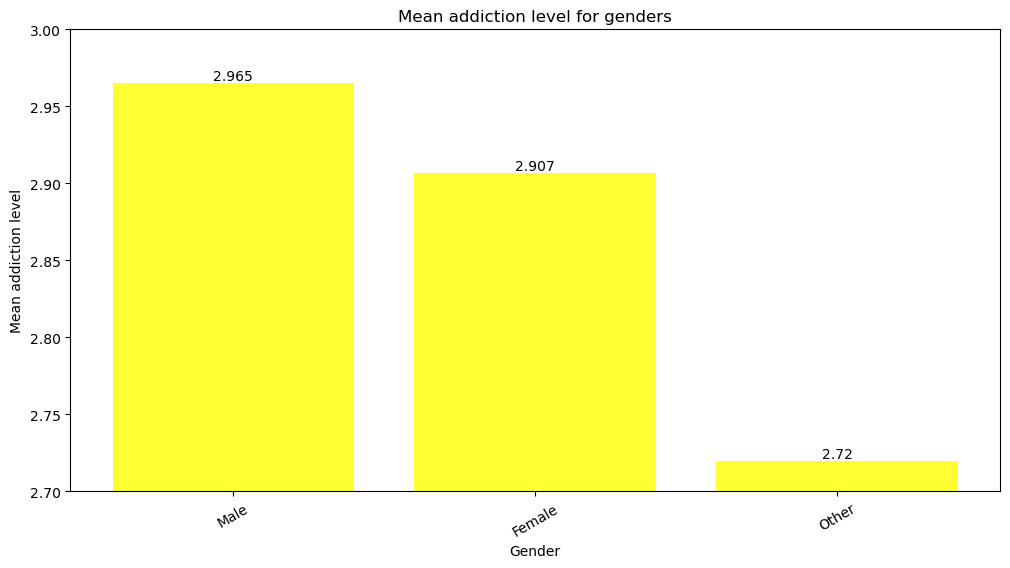

In [403]:
plt.figure(figsize=(12, 6))
bars = plt.bar(gender, add_lvl, color='#ffff33')
plt.xlabel('Gender')
plt.ylabel('Mean addiction level')
plt.title('Mean addiction level for genders')
plt.xticks(rotation=30)
plt.ylim(2.7, 3.)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.show()

In [405]:
location_addict_lvl = df.groupby('Location')['Addiction Level'].mean().sort_values(ascending=False)
location = location_addict_lvl.index.tolist() 
add_lvl = location_addict_lvl.values.tolist()

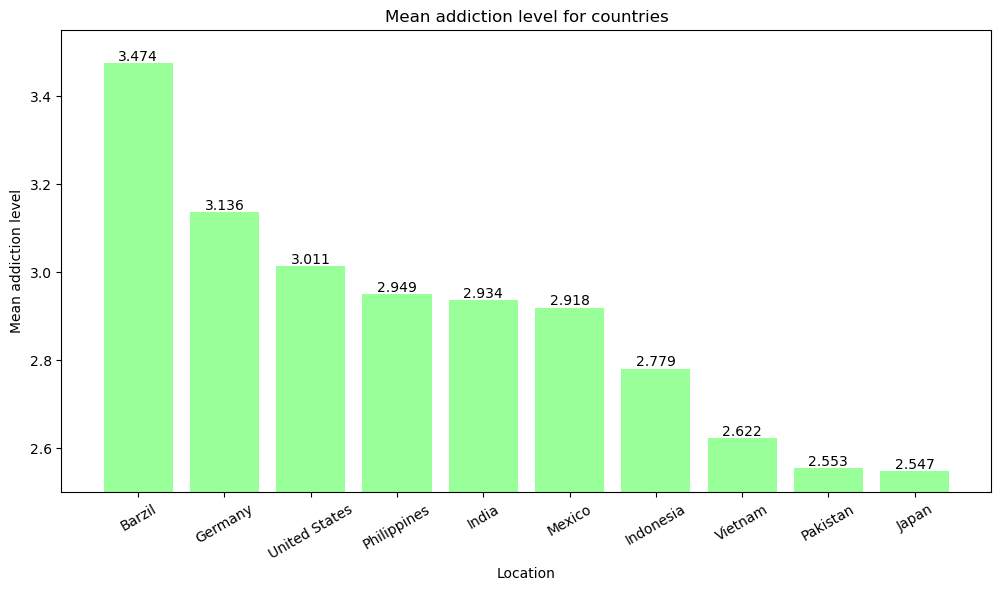

In [407]:
plt.figure(figsize=(12, 6))
bars = plt.bar(location, add_lvl, color='#99ff99')
plt.xlabel('Location')
plt.ylabel('Mean addiction level')
plt.title('Mean addiction level for countries')
plt.xticks(rotation=30)
plt.ylim(2.5, 3.55)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.show()

<h1>Platform Analysis</h1>

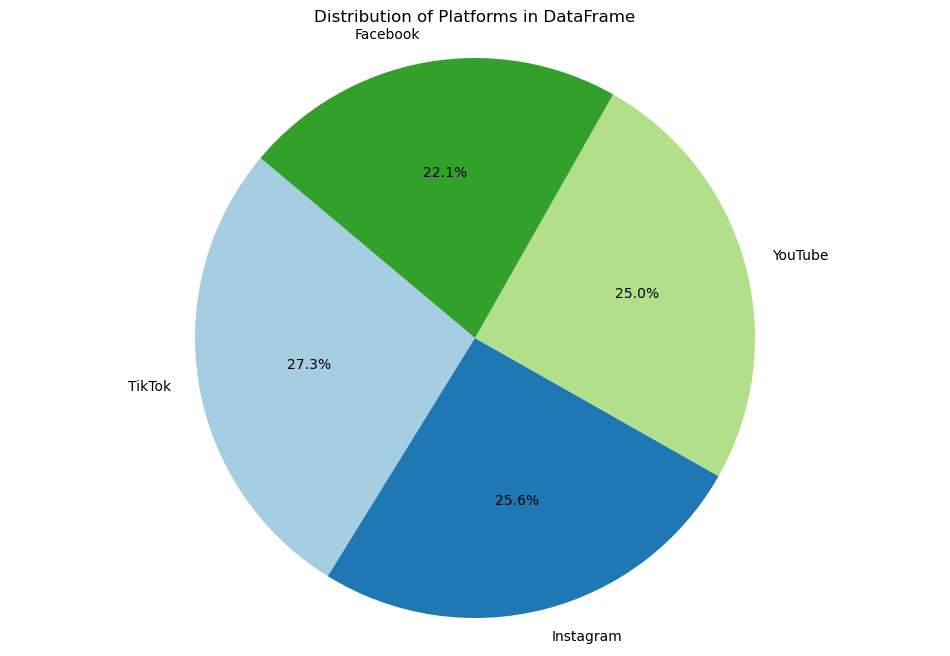

In [297]:
plt.figure(figsize=(12, 8))
plt.pie(platforms_counts, labels=platforms_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Platforms in DataFrame')
plt.axis('equal')
plt.show()

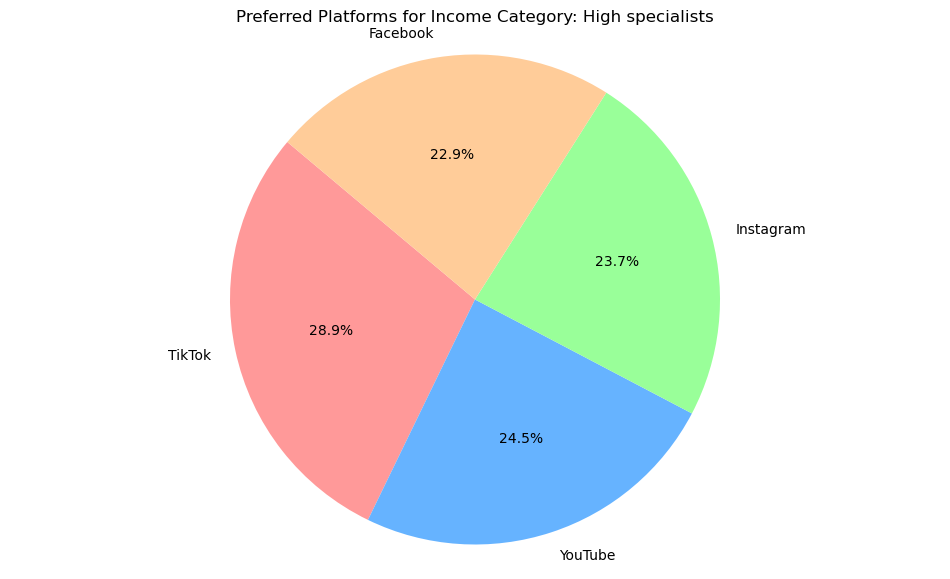

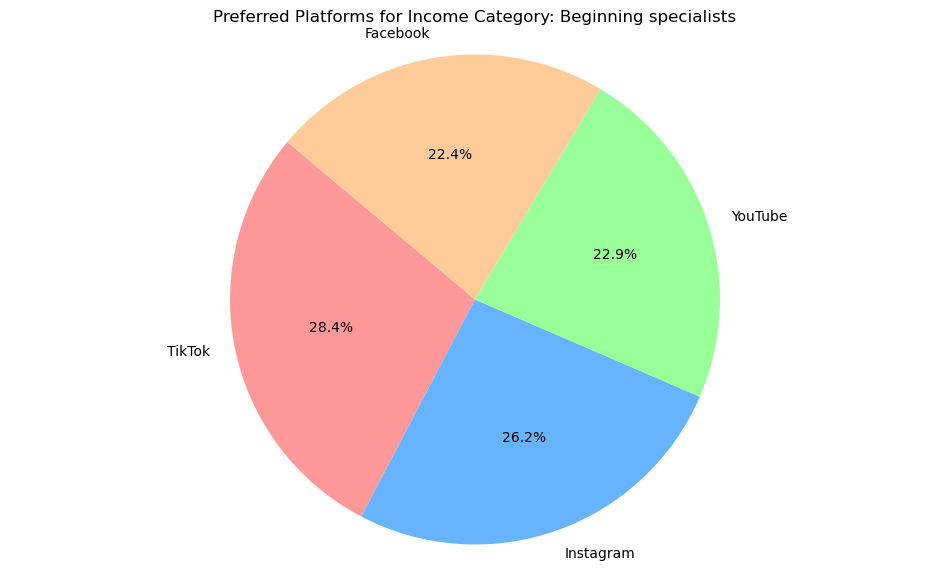

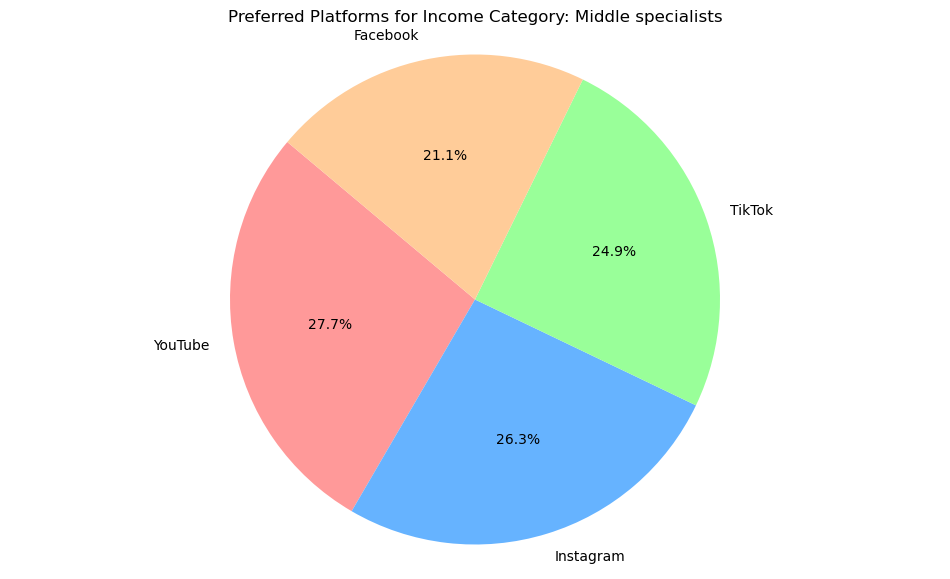

In [305]:
income_categories = df['IncomeCategory'].unique()
for category in income_categories:
    if category:
        plt.figure(figsize=(12, 7))
        sub_df = df[df['IncomeCategory'] == category]
        platform_counts = sub_df['Platform'].value_counts()
        plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])
        plt.title(f'Preferred Platforms for Income Category: {category}')
        plt.axis('equal')
        plt.show()

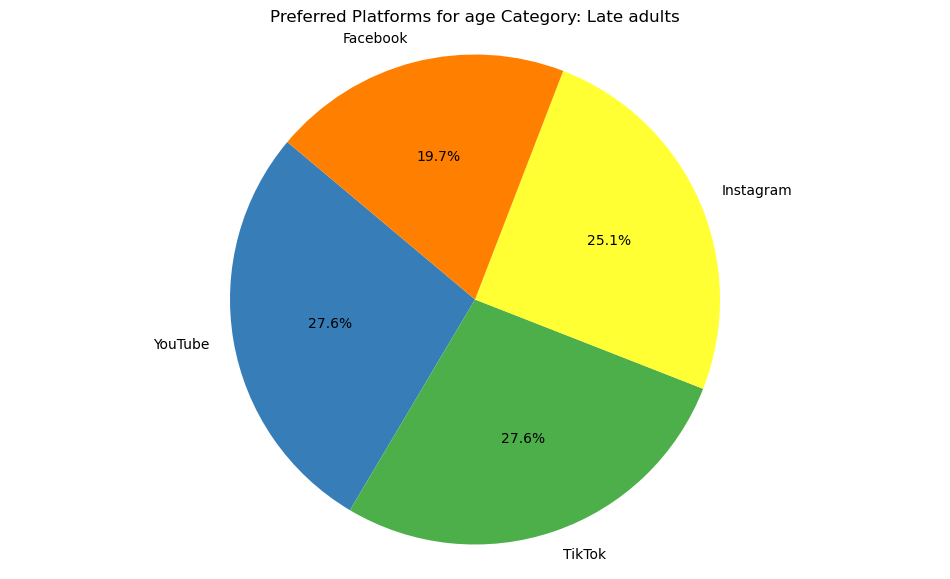

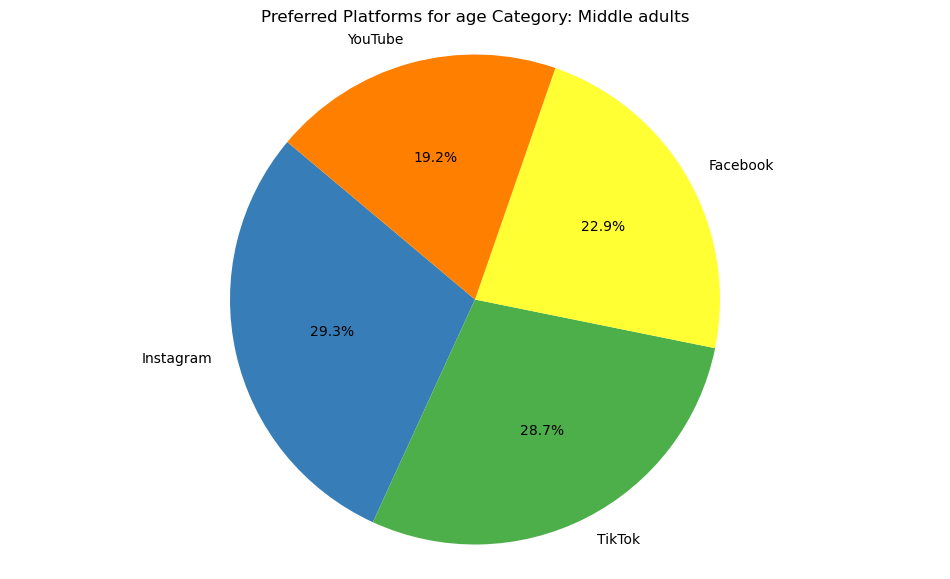

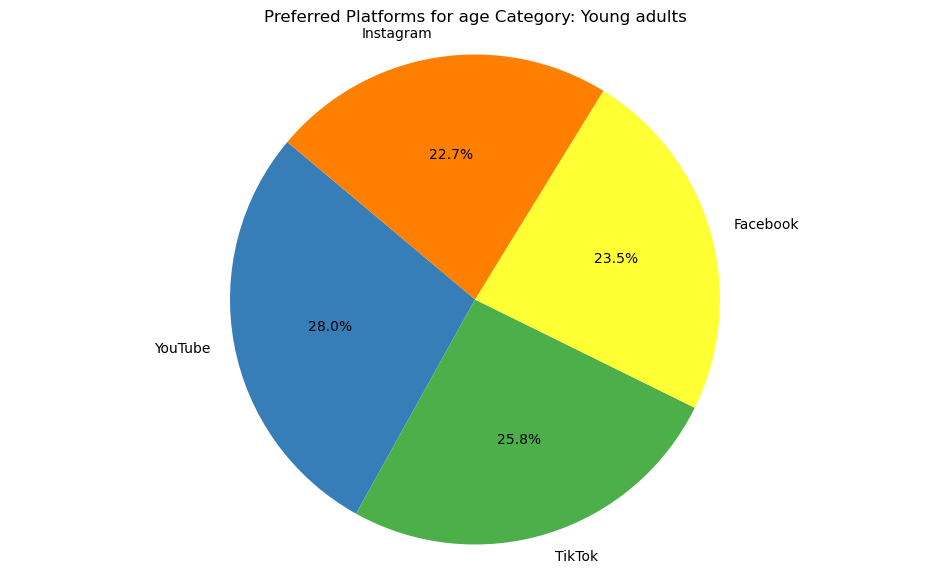

In [355]:
age_categories = df['AgeCategory'].unique()
for category in age_categories:
    if category:
        plt.figure(figsize=(12, 7))
        sub_df = df[df['AgeCategory'] == category]
        platform_counts = sub_df['Platform'].value_counts()
        plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=140, colors=['#377eb8', '#4daf4a', '#ffff33', '#ff7f00'])
        plt.title(f'Preferred Platforms for age Category: {category}')
        plt.axis('equal')
        plt.show()

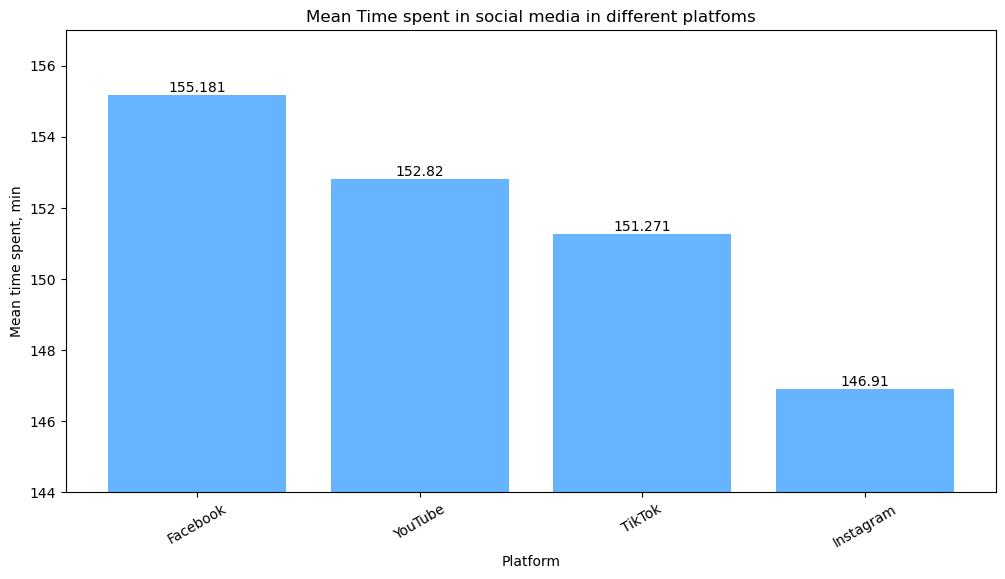

In [317]:
plt.figure(figsize=(12, 6))
bars = plt.bar(platform, time, color='#66b3ff')
plt.xlabel('Platform')
plt.ylabel('Mean time spent, min')
plt.title('Mean Time spent in social media in different platfoms')
plt.xticks(rotation=30)
plt.ylim(144, 157)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.show()

In [321]:
platform_scroll_rate = df.groupby('Platform')['Scroll Rate'].mean().sort_values(ascending=False)
platform = platform_scroll_rate.index.tolist() 
scroll_rate = platform_scroll_rate.values.tolist()

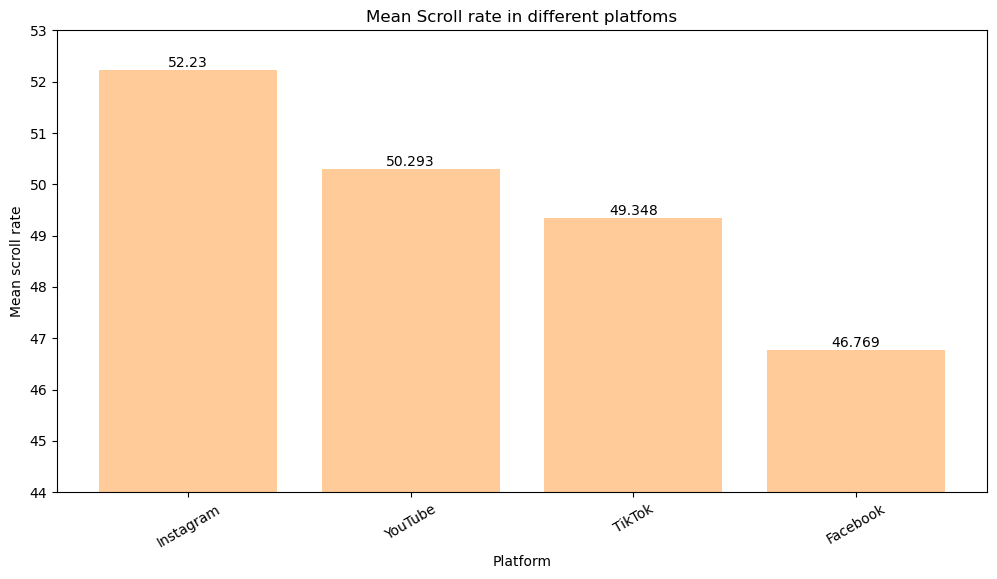

In [343]:
plt.figure(figsize=(12, 6))
bars = plt.bar(platform, scroll_rate, color='#ffcc99')
plt.xlabel('Platform')
plt.ylabel('Mean scroll rate')
plt.title('Mean Scroll rate in different platfoms')
plt.xticks(rotation=30)
plt.ylim(44, 53)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.show()

In [325]:
platform_video_num = df.groupby('Platform')['Number of Videos Watched'].mean().sort_values(ascending=False)
platform = platform_video_num.index.tolist() 
video_num = platform_video_num.values.tolist()

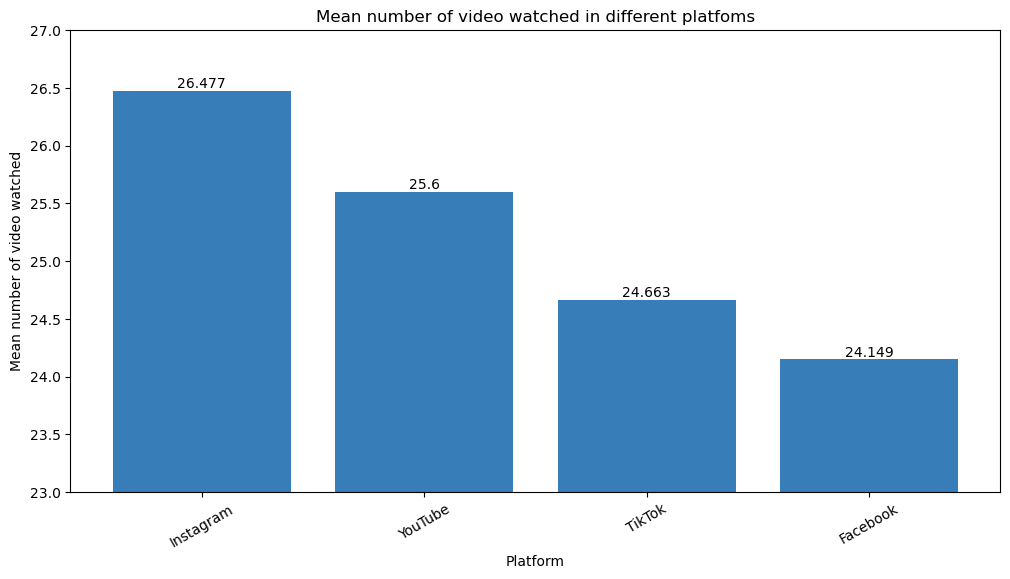

In [327]:
plt.figure(figsize=(12, 6))
bars = plt.bar(platform, video_num, color='#377eb8') #377eb8
plt.xlabel('Platform')
plt.ylabel('Mean number of video watched')
plt.title('Mean number of video watched in different platfoms')
plt.xticks(rotation=30)
plt.ylim(23, 27)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.show()

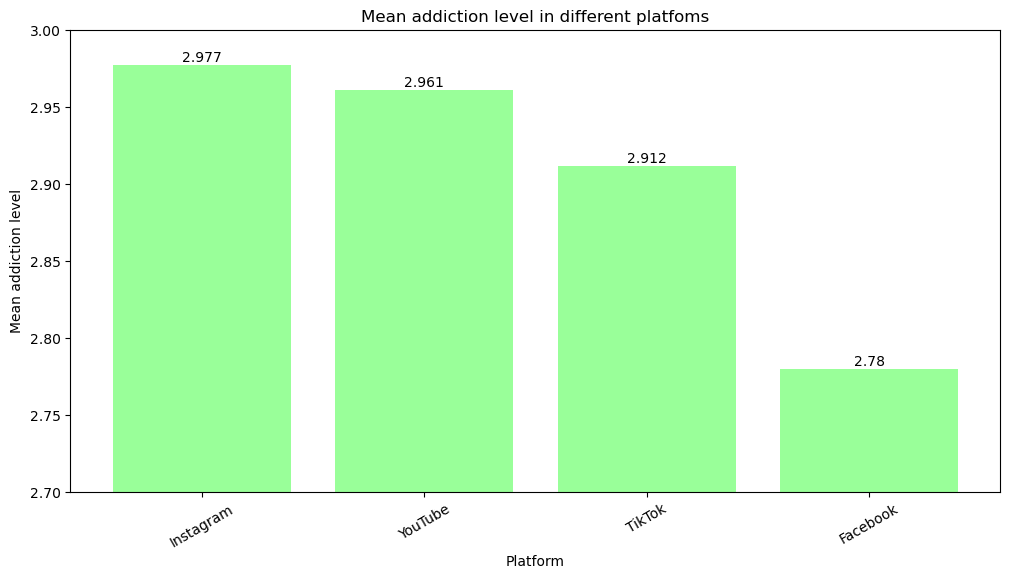

In [341]:
plt.figure(figsize=(12, 6))
bars = plt.bar(platform, add_lvl, color='#99ff99')
plt.xlabel('Platform')
plt.ylabel('Mean addiction level')
plt.title('Mean addiction level in different platfoms')
plt.xticks(rotation=30)
plt.ylim(2.7, 3)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.show()

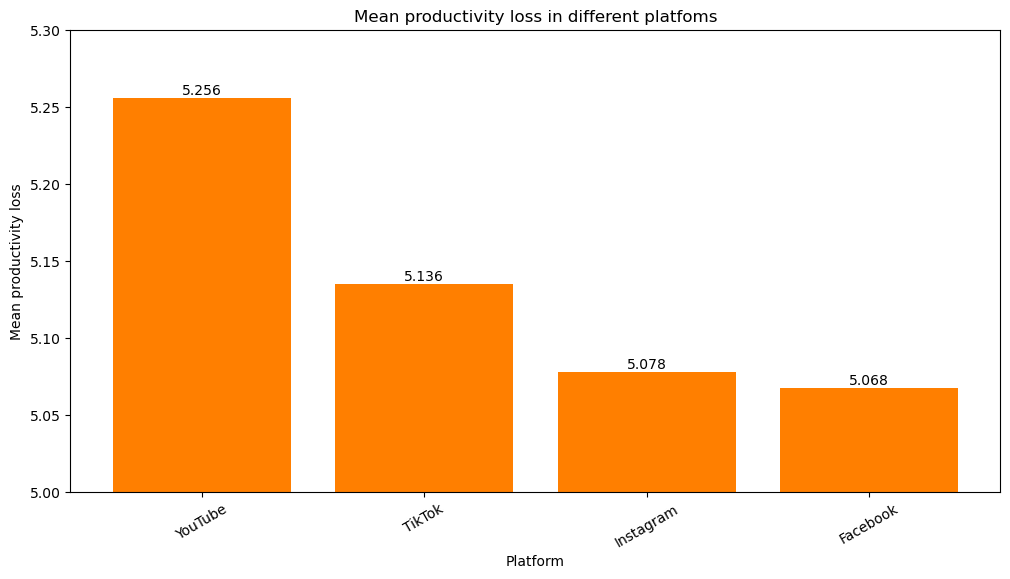

In [375]:
plt.figure(figsize=(12, 6))
bars = plt.bar(platform, prod_loss, color='#ff7f00')
plt.xlabel('Platform')
plt.ylabel('Mean productivity loss')
plt.title('Mean productivity loss in different platfoms')
plt.xticks(rotation=30)
plt.ylim(5, 5.3)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.show()

In [409]:
df.to_csv('social_network_exploratory_analysis_final.csv', index=False)